# "Improving ITSM Processes using Machine Learning"

> "Predicting High Priority Tickets-To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.
Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.
Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets."

- toc: true
- badges: true
- comments: true
- image: "images/itsm01.png"
- sticky_rank: 1
- search_exclude: false



# <font color=red>Import the required libraries and packages</font>

In [ ]:
#collapse
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

# importing required libraries and packages
import emoji
import emojis
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
import itertools
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
import itertools

print(emoji.emojize(":laptop:")*28
      ,"\n\nAll the required libraries and packages are imported successfully !!!\n\n"
      ,emoji.emojize(":laptop:")*28)

💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻 

All the required libraries and packages are imported successfully !!!

 💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻💻


# <font color=red>Load the dataset</font>

In [ ]:
#collapse
#loading the dataset
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/PM-PR-0012/itsm_data.csv', index_col=0, parse_dates=True)

print(emoji.emojize(":file_folder:")*12
      ,"\n\nData loaded successfully !!!\n\n"
      ,emoji.emojize(":file_folder:")*12)

📁📁📁📁📁📁📁📁📁📁📁📁 

Data loaded successfully !!!

 📁📁📁📁📁📁📁📁📁📁📁📁


In [ ]:
#collapse
# To have a glimpse of the data
print("\nGlimpse of data : "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data.head().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A60B2E'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_max(color='#0074FF',axis=0)\
.highlight_min(color='#00FFE5',axis=0)\
.highlight_null(null_color='#CCB3C5')


Glimpse of data :  👇🏻👇🏻👇🏻



,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.000000,0.601292,incident,KM0000553,closed,26.000000,05-02-2012 13:32,nan,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.000000,SD0000007,2.000000,nan,nan
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.000000,0.415050,incident,KM0000611,closed,33.000000,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.000000,SD0000011,1.000000,nan,nan
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,nan,0.517551,request for information,KM0000339,closed,3.000000,29-03-2012 12:36,nan,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.000000,SD0000017,nan,nan,nan
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.000000,0.642927,incident,KM0000611,closed,13.000000,17-07-2012 11:49,nan,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.000000,SD0000025,nan,nan,nan
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.000000,0.345258,incident,KM0000611,closed,2.000000,10-08-2012 11:01,nan,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.000000,SD0000029,nan,nan,nan


# <font color=red>Basic Info of the dataset</font>

In [ ]:
#collapse
#finding the no. of rows and cols
print("\nFinding the no. of rows and cols in the dataset : \n\n"
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

print("No. of Tickets : {}".format(data.shape[0]))
print("No. of Features : {}".format(data.shape[1]))


Finding the no. of rows and cols in the dataset : 

 👇🏻👇🏻👇🏻

No. of Tickets : 46606
No. of Features : 25


In [ ]:
#collapse
# Overview of shape, attributes, types and missing values
print("\nOverview of shape, attributes, types and missing values : \n\n"
,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data.info()


Overview of shape, attributes, types and missing values : 

 		 👇🏻👇🏻👇🏻

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status   

In [ ]:
#collapse
#converting object datatype into datetime
data['Open_Time']  = pd.to_datetime(data['Open_Time'],  infer_datetime_format=True)
data['Reopen_Time'] = pd.to_datetime(data['Reopen_Time'], infer_datetime_format=True)
data['Resolved_Time'] = pd.to_datetime(data['Resolved_Time'], infer_datetime_format=True)
data['Close_Time'] = pd.to_datetime(data['Close_Time'], infer_datetime_format=True)


In [ ]:
#collapse
# General stats of the numerical variables
print("\nGeneral stats of the numerical variables : "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
data.describe().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#753976'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


General stats of the numerical variables :  👇🏻👇🏻👇🏻



,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


<font color=skyblue>
📝📝 Essence of above dataframe : <br> 
✏️ Priority: The minimum integer value is 1 & maximum is 5. Tickets with highest priority get 1 & lowest get 5.<br>
✏️ No_of_Reassignments: On an average tickets are reassigned once and maximum 46 times.<br>
✏️ No_of_Related_Interactions: On an average a ticket has 1 related interaction & maximum of 370 related interactions.<br>
✏️ No_of_Related_Incidents: The maximum no. of related incidents can be 63 & minimum of 1.<br>
✏️ No_of_Related_Changes: The maximum no. of related changes is 9 & minimum is 1. <br>
</font>

In [ ]:
#collapse
# General stats of the categorical variables
print("\nGeneral stats of the categorical variables : "
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
data.describe(include=['object']).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#117A65'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


General stats of the categorical variables :  👇🏻👇🏻👇🏻



,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46605,46146,46606,560
unique,3019,12,64,274,46606,2,6,11,4,1825,1,30638,14,43060,232
top,SUB000456,application,Server Based Application,WBS000073,IM0005077,Closed,4,4,incident,KM0001106,closed,0,Other,#MULTIVALUE,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526,37748,1106,46606,236,16470,3434,110


<font color=skyblue>
📝📝 Essence of above dataframe : <br> 
✏️ CI_Name: There are more than 3k unique names.<br>
✏️ CI_Cat: There are 12 unique values for this feature & around 33k data points are categorised. Also most of the data points are categorised under application. <br>
✏️ CI_Subcat: This feature has 64 unique values and more than 18k data points are sub-categorised. Also most of the data points are sub-categorised under Server Based Application. <br>
✏️ WBS: This feature has 274 unique values.<br>
✏️ Incident_ID: For every data point this feature has a unique value.<br>
✏️ Status: This feature has 2 values but most of data points have closed value<br>
✏️ Impact: This feature has 6 unique values and mostly data points have value 4.<br>
✏️ Urgency: This feature has 11 unique values and mostly data points have value 4.<br>
✏️ Category: There are 4 unique values in this feature and mostly data points have value incident.<br>
✏️ KB_number: This feature has 1825 unique values.<br>
✏️ Alert_Status: This feature has only 1 value which is closed.<br>
✏️ Handle_Time_hrs: This feature has more than 30.5k unique values.<br>
✏️ Closure_Code: This feature has 14 unique values and most of the data point lie under the value other.<br>
✏️ Related_Interaction: Most of the data points have #MULTIVALUE value for this feature.<br>
✏️ Related_Change: There are 232 unique values and only for 560 data points.<br>
</font>

# <font color=red>Exploratory Data Analysis </font>

## <font color=green>1. Finding duplicate values</font>

In [ ]:
#collapse
# checking for duplicate values if present in the dataframe
print("Duplicate Data"
,emoji.emojize(":red_question_mark:")*2,"\n")
print(emoji.emojize(":check_mark_button:")*3
,"\n\n",data.duplicated().any()
,"\n\n",emoji.emojize(":check_mark_button:")*3)

Duplicate Data ❓❓ 

✅✅✅ 

 False 

 ✅✅✅


<font color=skyblue>There is no duplicate data.</font>

## <font color=green>2. Finding Missing Values</font>



In [ ]:
#collapse
#checking for missing values
print("Missing values"
      ,emoji.emojize(":red_question_mark:")*2,"\n")
print(emoji.emojize(":cross_mark_button:")*3
,"\n\n",data.isnull().values.any()
,"\n\n",emoji.emojize(":cross_mark_button:")*3)

Missing values ❓❓ 

❎❎❎ 

 True 

 ❎❎❎


In [ ]:
#collapse
print('\nMissing Values in the data : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#610646'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_null(null_color='#CCB3C5')


Missing Values in the data :  👇🏻👇🏻👇🏻



,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.000000,0.601292,incident,KM0000553,closed,26.000000,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,"3,87,16,91,111",Other,1.000000,SD0000007,2.000000,nan,nan
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.000000,0.415050,incident,KM0000611,closed,33.000000,2012-12-03 15:44:00,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,"4,35,47,86,389",Software,1.000000,SD0000011,1.000000,nan,nan
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,nan,0.517551,request for information,KM0000339,closed,3.000000,2012-03-29 12:36:00,NaT,2014-01-13 15:12:00,2014-01-13 15:13:00,"4,84,31,19,444",No error - works as designed,1.000000,SD0000017,nan,nan,nan
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.000000,0.642927,incident,KM0000611,closed,13.000000,2012-07-17 11:49:00,NaT,2013-11-14 09:31:00,2013-11-14 09:31:00,"4,32,18,33,333",Operator error,1.000000,SD0000025,nan,nan,nan
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.000000,0.345258,incident,KM0000611,closed,2.000000,2012-10-08 11:01:00,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,"3,38,39,03,333",Other,1.000000,SD0000029,nan,nan,nan
5,WBA000124,application,Web Based Application,WBS000088,IM0000013,Closed,4,4,4.000000,0.006676,incident,KM0000611,closed,4.000000,2012-10-08 11:27:00,NaT,2013-08-11 13:54:00,2013-08-11 13:54:00,"3,38,34,36,944",Other,1.000000,SD0000031,nan,nan,nan
6,WBA000082,application,Web Based Application,WBS000055,IM0000014,Closed,4,4,4.000000,0.192907,incident,KM0000401,closed,2.000000,2012-08-15 14:17:00,NaT,2013-12-27 10:59:00,2013-12-27 10:59:00,"3,70,31,91,389",Unknown,1.000000,SD0000033,nan,nan,nan
7,WBA000124,application,Web Based Application,WBS000088,IM0000015,Closed,4,4,4.000000,0.996468,incident,KM0000611,closed,5.000000,2012-08-22 16:31:00,NaT,2013-08-11 14:09:00,2013-08-11 14:09:00,"3,29,46,24,167",Other,1.000000,SD0000034,nan,nan,nan
8,WBA000124,application,Web Based Application,WBS000088,IM0000017,Closed,NS,3,nan,0.269574,incident,KM0000611,closed,2.000000,2012-08-29 15:59:00,NaT,2013-08-11 14:02:00,2013-08-11 14:02:00,"0,862777778",Other,1.000000,SD0000036,nan,nan,nan
9,WBA000082,application,Web Based Application,WBS000055,IM0000018,Closed,4,4,4.000000,0.306670,incident,KM0000401,closed,2.000000,2012-03-09 16:04:00,NaT,2013-08-11 14:33:00,2013-08-11 14:35:00,"3,21,15,26,944",No error - works as designed,1.000000,SD0000037,nan,nan,nan


In [ ]:
#collapse
#getting total no. of missing values
print('\nCount of Missing Values in each column of the data : \n\n'
," ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data.isnull().sum().to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A15F86'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Count of Missing Values in each column of the data : 

   👇🏻👇🏻👇🏻



,0
CI_Name,0
CI_Cat,111
CI_Subcat,111
WBS,0
Incident_ID,0
Status,0
Impact,0
Urgency,0
Priority,1380
number_cnt,0


<font color=skyblue>Missing values present in the dataset.</font>

## <font color=green>3. Finding Features with one value</font>

In [ ]:
#collapse
# All the features with their unique values
print('\nUnique Values in each column of the data : \n\n'
," ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")
for column in data.columns:
  print(emoji.emojize(":arrow_right:", use_aliases=True)
  ,column
  ,emoji.emojize(":1234:", use_aliases=True)
  ,data[column].nunique())


Unique Values in each column of the data : 

   👇🏻👇🏻👇🏻

➡ CI_Name 🔢 3019
➡ CI_Cat 🔢 12
➡ CI_Subcat 🔢 64
➡ WBS 🔢 274
➡ Incident_ID 🔢 46606
➡ Status 🔢 2
➡ Impact 🔢 6
➡ Urgency 🔢 11
➡ Priority 🔢 5
➡ number_cnt 🔢 46606
➡ Category 🔢 4
➡ KB_number 🔢 1825
➡ Alert_Status 🔢 1
➡ No_of_Reassignments 🔢 41
➡ Open_Time 🔢 34636
➡ Reopen_Time 🔢 2244
➡ Resolved_Time 🔢 33627
➡ Close_Time 🔢 34528
➡ Handle_Time_hrs 🔢 30638
➡ Closure_Code 🔢 14
➡ No_of_Related_Interactions 🔢 49
➡ Related_Interaction 🔢 43060
➡ No_of_Related_Incidents 🔢 24
➡ No_of_Related_Changes 🔢 4
➡ Related_Change 🔢 232


<font color=skyblue>Variable Alert_Status has only 1 value. Hence this column can be dropped.</font>

## <font color=green>4. Exploring categorical features.</font>

In [ ]:
#collapse
# displaying each categorical feature with its unique no. of categories
cols = ['Open_Time','Reopen_Time','Resolved_Time','Close_Time','Handle_Time_hrs']
categorical_features = [feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in cols))]
for feature in categorical_features:
    print("\nThe variable '{}' has {} categories ".format(feature,len(data[feature].unique()))
          ,"\n"
          ,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3
          ,"\n"
          ,"{}".format(data[feature].unique()))
 


The variable 'CI_Name' has 3019 categories  
 		 👇🏻👇🏻👇🏻 
 ['SUB000508' 'WBA000124' 'DTA000024' ... 'CBD000595' 'CBD000443'
 'SWT000008']

The variable 'CI_Cat' has 13 categories  
 		 👇🏻👇🏻👇🏻 
 ['subapplication' 'application' 'computer' nan 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']

The variable 'CI_Subcat' has 65 categories  
 		 👇🏻👇🏻👇🏻 
 ['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' nan 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Scanner' 'Controller'
 'DataCenterEquipment' 'KVM Switches' 'Switch' 'Database Software'
 'Network Component' 'Unix Server' 'Lines' 'ESX Cluster' 'zOS Server'
 'SharePoint Farm' 'NonStop Se

## <font color=green>5. Distribution of categorical features.</font>

In [ ]:
#collapse
def cat_countplot(cat_feature, dataset):
    if cat_feature in categorical_features:
        print()
        print("\n",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2
              ,"Distribution of '{}' ".format(cat_feature)
              ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*2)
        print("")
        plt.style.use('dark_background')
        plt.figure(figsize=(10,8))
        Y = data[cat_feature]
        total = len(Y)*1
        ax = sns.countplot(x=cat_feature,data=data,order=data[cat_feature].value_counts().index)
        plt.xlabel(cat_feature, fontsize = 20)
        #put 11 ticks (for 10 steps), from 0 to the total number of rows in the dataframe
        ax.yaxis.set_ticks(np.linspace(0, total, 11))
        #adjust the ticklabel to the desired format, without changing the position of the ticks
        ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), fontsize = 12)
    
        plt.show()

    else:
        print(emoji.emojize(":cross_mark:")*2
              ,"The entered feature is not categorical !!!!"
              ,emoji.emojize(":cross_mark:")*2)
    

### <font color=purple>Feature : CI_Cat</font>



 📈📈 Distribution of 'CI_Cat'  📈📈



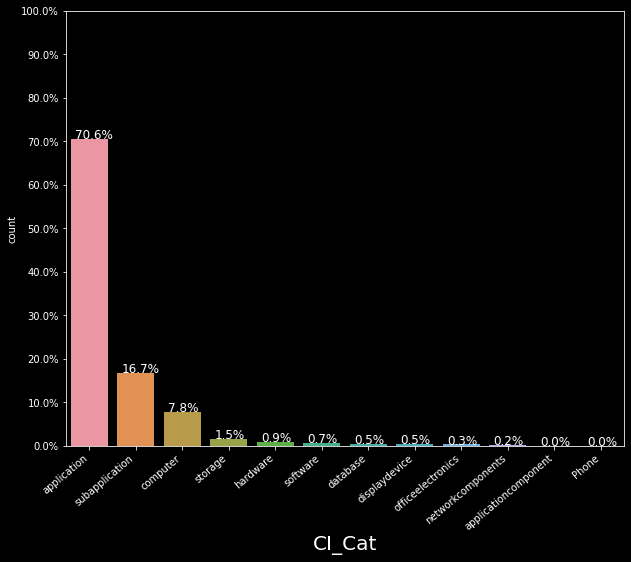

In [ ]:
#collapse
cat_countplot('CI_Cat', data)

#### <font color=darkred>Replacing some categories with corresponding major category</font>

<font color=skyblue>The  variable 'CI_Cat' has a lot of labels and can be replaced by the major ones.</font>



 📈📈 Distribution of 'CI_Cat'  📈📈



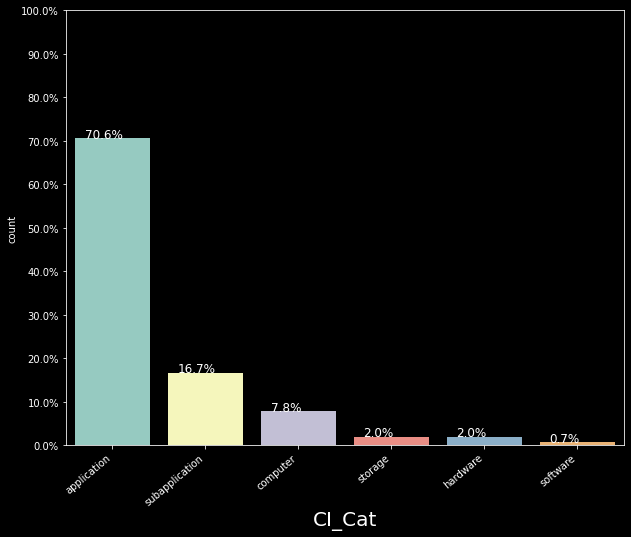

In [ ]:
#collapse
data.CI_Cat.replace(to_replace="database", value='storage', inplace=True)
data.CI_Cat.replace(to_replace="applicationcomponent", value='subapplication', inplace=True)
data.CI_Cat.replace(to_replace=['displaydevice','officeelectronics','Phone','networkcomponents'], value='hardware', inplace=True)

cat_countplot('CI_Cat', data)

<font color=skyblue>Most of the tickets are application related which is around 70% and only 0.7 % are other Software related.</font>

### <font color=purple>Feature : CI_Subcat</font>



 📈📈 Distribution of 'CI_Subcat'  📈📈



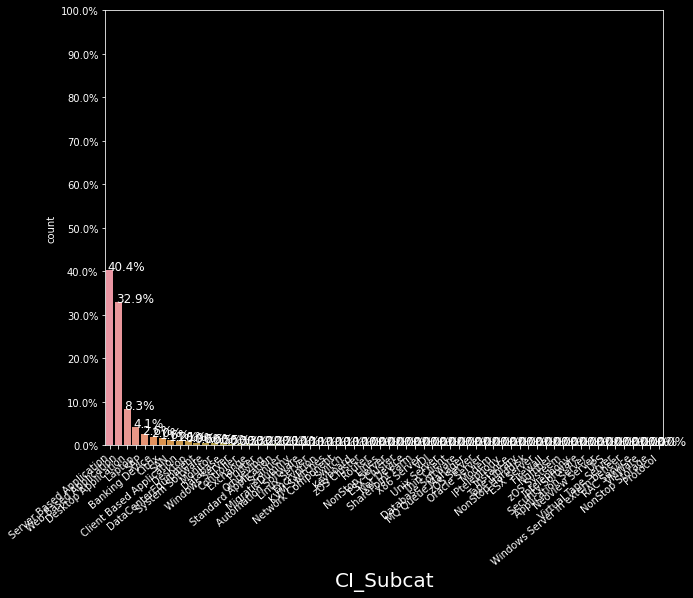

In [ ]:
#collapse
cat_countplot('CI_Subcat', data)

#### <font color=darkred>Replacing some categories with corresponding major category</font>

<font color=skyblue>The  variable 'CI_Subcat' has a lot of labels and can be replaced by the major ones.</font>



 📈📈 Distribution of 'CI_Subcat'  📈📈



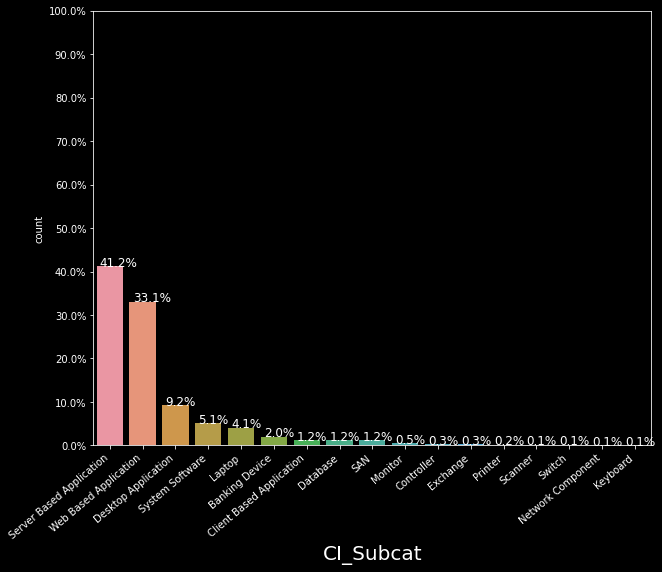

In [ ]:
#collapse
data.CI_Subcat.replace(to_replace="Desktop", value="Desktop Application", inplace=True)

data.CI_Subcat.replace(to_replace=['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'], value="Server Based Application", inplace=True)

data.CI_Subcat.replace(to_replace="RAC Service", value="Banking Device", inplace=True)

data.CI_Subcat.replace(to_replace=['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'], value="Web Based Application", inplace=True)

data.CI_Subcat.replace(to_replace=['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'], value="System Software", inplace=True)

data.CI_Subcat.replace(to_replace=['UPS','Omgeving'], value="Client Based Application", inplace=True)

data.CI_Subcat.replace(to_replace=['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'], value="Database", inplace=True)

data.CI_Subcat.replace(to_replace=['Modem','Router'], value="Network Component", inplace=True)

data.CI_Subcat.replace(to_replace="KVM Switches", value="Switch", inplace=True)

cat_countplot('CI_Subcat', data)

<font color=skyblue>Around 41% of the tickets are related to Server Based Applications, followed by Web Based Application.</font>

### <font color=purple>Feature : Status</font>



 📈📈 Distribution of 'Status'  📈📈



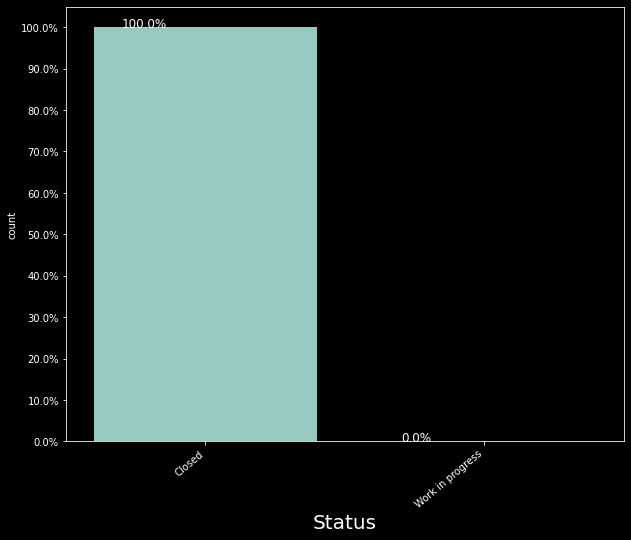

In [ ]:
#collapse
cat_countplot('Status', data)

<font color=skyblue>We can drop this feature.</font>

### <font color=purple>Feature : Impact</font>



 📈📈 Distribution of 'Impact'  📈📈



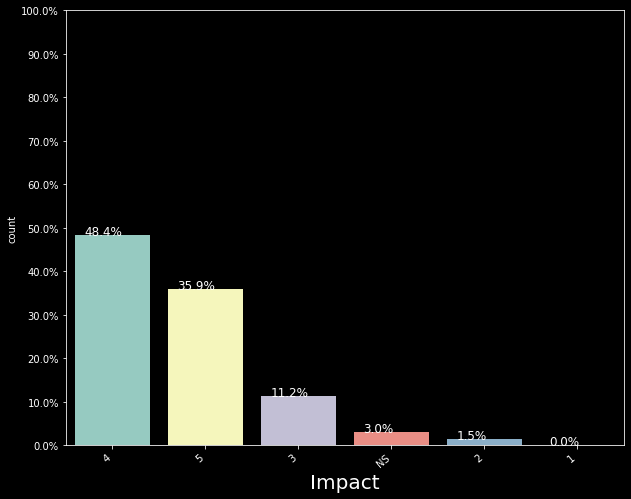

In [ ]:
#collapse
cat_countplot('Impact', data)

<font color=skyblue>Around 50% of the tickets have Impact value 4, followed by value 5.</font>

### <font color=purple>Feature : Urgency</font>



 📈📈 Distribution of 'Urgency'  📈📈



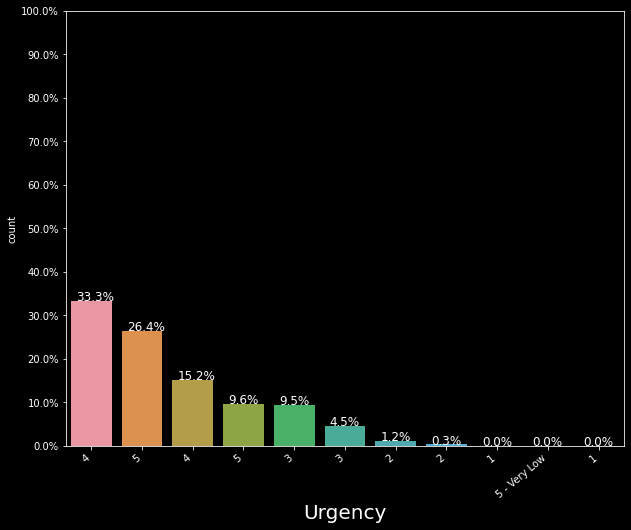

In [ ]:
#collapse
cat_countplot('Urgency', data)

#### <font color=darkred>Replacing some categories with corresponding major category</font>

In [ ]:
#collapse
data.Urgency.replace(to_replace='5 - Very Low',value='5',inplace=True)
data.Urgency.replace(to_replace=5,value='5',inplace=True)
data.Urgency.replace(to_replace=4,value='4',inplace=True)
data.Urgency.replace(to_replace=3,value='3',inplace=True)
data.Urgency.replace(to_replace=2,value='2',inplace=True)
data.Urgency.replace(to_replace=1,value='1',inplace=True)



 📈📈 Distribution of 'Urgency'  📈📈



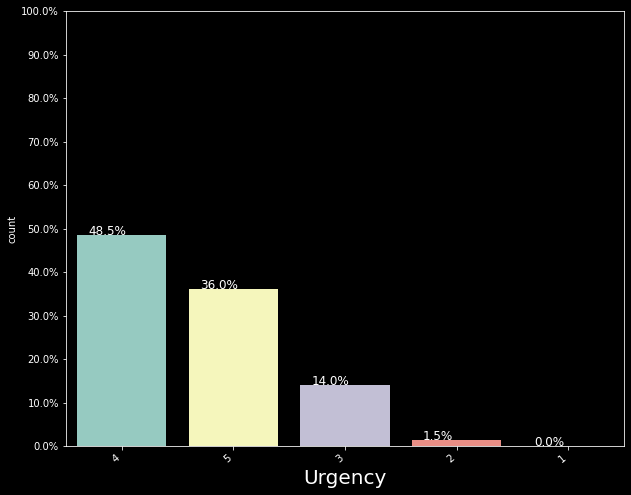

In [ ]:
#collapse
cat_countplot('Urgency', data)

<font color=skyblue>Around 50% of the tickets have Urgency value 4, followed by value 5.</font>

### <font color=purple>Feature : Category</font>



 📈📈 Distribution of 'Category'  📈📈



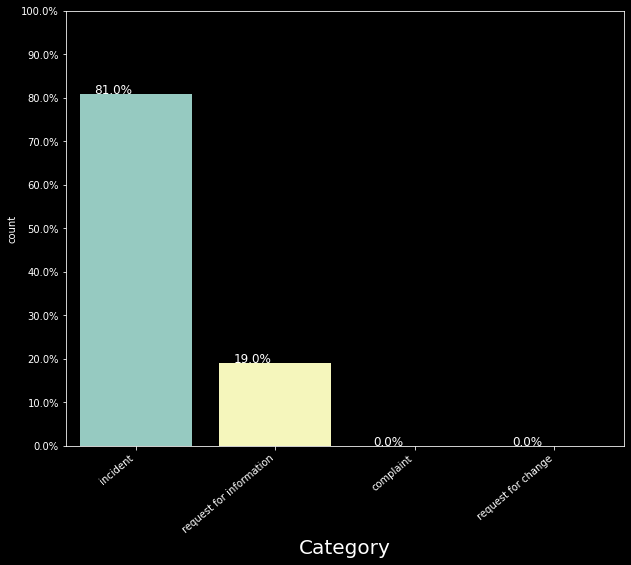

In [ ]:
#collapse
cat_countplot('Category', data)

<font color=skyblue>More than 80% of the tickets are related to incident and rest are related to request for information.</font>

### <font color=purple>Feature : Closure_Code</font>



 📈📈 Distribution of 'Closure_Code'  📈📈



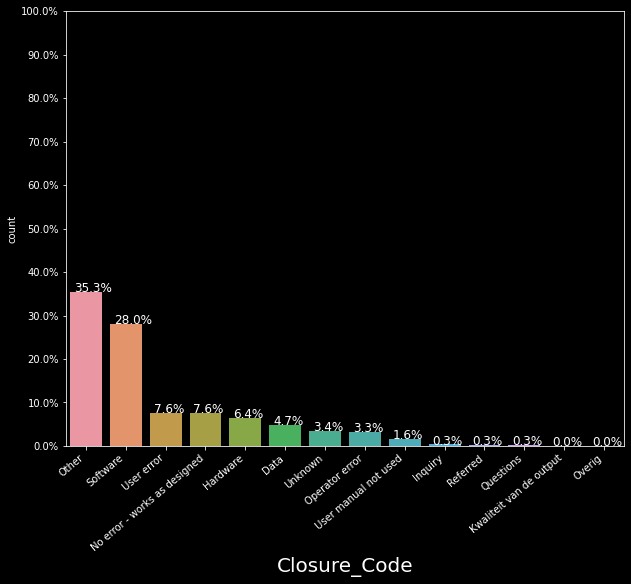

In [ ]:
#collapse
cat_countplot('Closure_Code', data)

<font color=skyblue>More than 35% of the tickets have the closure code as other, followed by software.</font>

## <font color=green>6. Exploring numerical features.</font>

In [ ]:
#collapse
# displaying each categorical feature with its unique no. of categories
numerical_features = [feature for feature in data.columns if (data[feature].dtypes=='float64')]
for feature in numerical_features:
    print("\nThe variable '{}' has {} categories ".format(feature,len(data[feature].unique()))
          ,"\n"
          ,"\t\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3
          ,"\n"
          ,"{}".format(data[feature].unique()))
 


The variable 'Priority' has 6 categories  
 		 👇🏻👇🏻👇🏻 
 [ 4.  3. nan  5.  2.  1.]

The variable 'number_cnt' has 46606 categories  
 		 👇🏻👇🏻👇🏻 
 [0.60129228 0.41504997 0.51755133 ... 0.91746629 0.70127816 0.90231951]

The variable 'No_of_Reassignments' has 42 categories  
 		 👇🏻👇🏻👇🏻 
 [26. 33.  3. 13.  2.  4.  5.  6.  8. 17.  1.  7. 12.  0. 11.  9. 25. 30.
 15. 37. 32. 22. 10. 21. 19. 14. 46. 18. 16. 42. 23. 39. 20. 45. 38. 24.
 34. 29. 27. 31. nan 36.]

The variable 'No_of_Related_Interactions' has 50 categories  
 		 👇🏻👇🏻👇🏻 
 [  1.   2.   3.  14.   7.   4.   5. 370.   9.  11.  54.  nan 288.  34.
  44.  39.  12.  42.   6.   8.  28.  29.  13.  18.  20.  15.  31.  88.
  30.  41.  74.  16.  24.  17.  57.  33.  10. 118.  45.  55.  40.  19.
  22.  23.  37.  26.  43.  25.  27.  21.]

The variable 'No_of_Related_Incidents' has 25 categories  
 		 👇🏻👇🏻👇🏻 
 [ 2.  1. nan 23.  4.  3.  7. 11. 12. 54. 24. 16.  8.  6. 25. 14. 10.  9.
  5. 17. 26. 21. 63. 13. 15.]

The variable 'No_of_Related_Chang

## <font color=green>7. Distribution of numerical features</font>

In [ ]:
#collapse 
def num_histplot(feature, dataset):
    """
    It takes the numerical variable and dataset as 
    input and plots the histogram for the particular.
    
    """
    if feature in numerical_features:
        print("\n\t\t    ",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3
              ,"Distribution of '{}'".format(feature)
              ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3)
        print("")
        plt.style.use('dark_background')
        plt.figure(figsize=(10,8))
        sns.histplot(dataset[feature], kde=True, bins=10,color='#F78AB2')
        plt.show()
            
    else:
        print(emoji.emojize(":cross_mark:")*2
              ,"It's not a numerical feature !!!"
              ,emoji.emojize(":cross_mark:")*2)


## <font color=green>8. Outliers in numerical features</font>

In [ ]:
#collapse 
def outliers_des(feature, dataset):
    """
    It takes the numerical variable and dataset as input styler object of Skewness, Kurtosis
    ,Median, Count, Mean, Standard Deviation, Min. value, Q1, Q2, Q3, Q4, Max. value, IQR
    ,Lower Outliers Limit, Upper Outliers Limit, Lower Outliers Count with percentage 
    ,Upper Outliers Count with percentage, Outliers Count with percentage for the particular.
    
    """
    if feature in numerical_features:
        print("\n\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3
              ,"Boxplot of '{}' ".format(feature)
              ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3)
        print("")
        #plotting the boxplot
        plt.style.use('dark_background')
        plt.figure(figsize=(10,8))
        sns.boxplot(y=dataset[feature] , data=dataset, palette='flare')
        plt.xlabel(feature)
        plt.show()
        #  Parameters to check presence of outliers in the distribution
        v1 = pd.DataFrame({' Parameters ': ' Skewness'
                         , ' Values ' : "{:.2f}".format(dataset[feature].skew())},index={'1'})
        
        v2 = pd.DataFrame({' Parameters ': ' Kurtosis'
                         , ' Values ' : "{:.2f}".format(dataset[feature].kurtosis())},index={'2'})
        
        v3 = pd.DataFrame({' Parameters ': ' Median'
                         , ' Values ' : "{:.2f}".format(dataset[feature].quantile())},index={'3'})

        v4 = pd.DataFrame({' Parameters ': ' Count'
                         , ' Values ' : "{:.2f}".format(dataset[feature].describe()[0])},index={'4'})
        
        v5 = pd.DataFrame({' Parameters ': ' Mean'
                         , ' Values ' : "{:.2f}".format(dataset[feature].describe()[1])},index={'5'})
        
        v6 = pd.DataFrame({' Parameters ': ' Stand. Dev.'
                         , ' Values ' : "{:.2f}".format(dataset[feature].describe()[2])},index={'6'})
        
        v7 = pd.DataFrame({' Parameters ': ' Minimum'
                         , ' Values ' : "{:.2f}".format(dataset[feature].describe()[3])},index={'7'})
        
        v8 = pd.DataFrame({' Parameters ': ' Q1 (25%)'
                         , ' Values ' : "{:.2f}".format(dataset[feature].describe()[4])},index={'8'})
        
        v9 = pd.DataFrame({' Parameters ': ' Q2 (50%)'
                         , ' Values ' : "{:.2f}".format(dataset[feature].describe()[5])},index={'9'})
        
        v10 = pd.DataFrame({' Parameters ': ' Q3 (75%)'
                          , ' Values ' : "{:.2f}".format(dataset[feature].describe()[6])},index={'10'})
        
        v11 = pd.DataFrame({' Parameters ': ' Maximum'
                          , ' Values ' : "{:.2f}".format(dataset[feature].describe()[7])},index={'11'})
        
        #finding Interquartile range      
        iqr = dataset[feature].quantile(q = 0.75) - dataset[feature].quantile(q = 0.25)
        v12 = pd.DataFrame({' Parameters ': ' IQR'
                          , ' Values ' : "{:.2f}".format(iqr)},index={'12'})

        #Outlier detection from IQR
        lower_outliers = dataset[feature].quantile(q = 0.25) - (iqr*1.5)
        v13 = pd.DataFrame({' Parameters ': ' Lower outliers Limit '
                          , ' Values ' : "{:.2f} ".format(lower_outliers)},index={'13'})

        upper_outliers = dataset[feature].quantile(q = 0.75) + (iqr*1.5)
        v14 = pd.DataFrame({' Parameters ': ' Upper outliers Limit '
                          , ' Values ' : "{:.2f}".format(upper_outliers)},index={'14'})
        
        #checking the presence of outliers with upper & lower limits
        lower_out_count = dataset[(dataset[feature] < (dataset[feature].quantile(q = 0.25)-(iqr*1.5)) )][feature].count()
        lower_out_pct = round(lower_out_count / dataset[feature].count() * 100, 1)
        v15 = pd.DataFrame({' Parameters ': ' Lower outliers count '
                          , ' Values ' : "{} ({}%)".format(lower_out_count, lower_out_pct)},index={'15'})

        upper_out_count = dataset[(dataset[feature] > (dataset[feature].quantile(q = 0.75)+(iqr*1.5)) )][feature].count()
        upper_out_pct = round(upper_out_count / dataset[feature].count() * 100, 1)
        v16 = pd.DataFrame({' Parameters ': ' Upper outliers count '
                          , ' Values ' : "{} ({}%)".format(upper_out_count, upper_out_pct)},index={'16'})

        outliers = dataset[(dataset[feature]< (dataset[feature].quantile(q = 0.25)-(iqr*1.5)))
                         | (dataset[feature] > (dataset[feature].quantile(q = 0.75)+(iqr*1.5)) )][feature].count()

        outliers_pct = round(outliers / dataset[feature].count() * 100, 1)
        v17 = pd.DataFrame({' Parameters ': ' Outliers count '
                          , ' Values ' : "{} ({}%)".format(outliers, outliers_pct)},index={'17'})
      
        result = pd.concat([v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17])
    
        result.columns = [' Parameters ',' Values ']
        
        if outliers==0:
          print("\n",emoji.emojize(":check_mark:")*2
                ,emoji.emojize(":thumbs_up_light_skin_tone:")*2
                ," NO Outliers "
                ,emoji.emojize(":thumbs_up_light_skin_tone:")*2
                ,emoji.emojize(":check_mark:")*2,"\n")
          not_outliers = dataset[(dataset[feature]>= (dataset[feature].quantile(q = 0.25)-(iqr*1.5)))
                               | (dataset[feature] <= (dataset[feature].quantile(q = 0.75)+(iqr*1.5)) )][feature].count()
                               
          not_outliers_pct = round(not_outliers / dataset[feature].count() * 100, 1)
            
          result = result.iloc[:-5,:]
          v18 = pd.DataFrame({' Parameters ': ' observation count w/o outliers '
                            , ' Values ' : "{} ({}%)".format(not_outliers, not_outliers_pct)},index={'13'})
          result = pd.concat([result,v18])
          result.columns = [' Parameters ',' Values ']

        else:
          print("\n",emoji.emojize(":cross_mark:")*2
              ,emoji.emojize(":thumbs_down_light_skin_tone:")*2
              ,"Outliers Present"
              ,emoji.emojize(":thumbs_down_light_skin_tone:")*2
              ,emoji.emojize(":cross_mark:")*2,"\n")  
          
        result = result.style.set_table_styles(
            [{'selector': 'th',
              'props': [('background', '#34495E'),
                        ('color', 'white'),
                        ('font-family', 'verdana'),
                        ('font-size', '10pt')]},
   
             {'selector': 'td',
              'props': [('font-family', 'verdana'),
                        ('padding','0em 0em')]},
            
             {'selector': 'tr:nth-of-type(odd)',
              'props': [('background', '#ABB2B9'),
                        ('color', 'black')]},
  
             {'selector': 'tr:nth-of-type(even)',
              'props': [('background', 'white'),
                        ('color', 'black')]},
 
             {'selector': 'tr:hover',
              'props': [('background-color', 'pink')]},
 
             {'selector': 'th:hover',
              'props': [('font-size', '18pt')]},
   
            {'selector': 'tr:hover td:hover',
             'props': [('max-width', '1000px'),
                       ('font-size', '18pt')]}

          ]
          ).set_properties(**{'background-color': '#FEF5E7'}, subset=[' Parameters '])

        return result

    else:
        print(emoji.emojize(":cross_mark:")*2
              ,"It's not a numerical feature !!!"
              ,emoji.emojize(":cross_mark:")*2)

### <font color=purple>Feature : Priority</font>


		     📈📈📈 Distribution of 'Priority' 📈📈📈



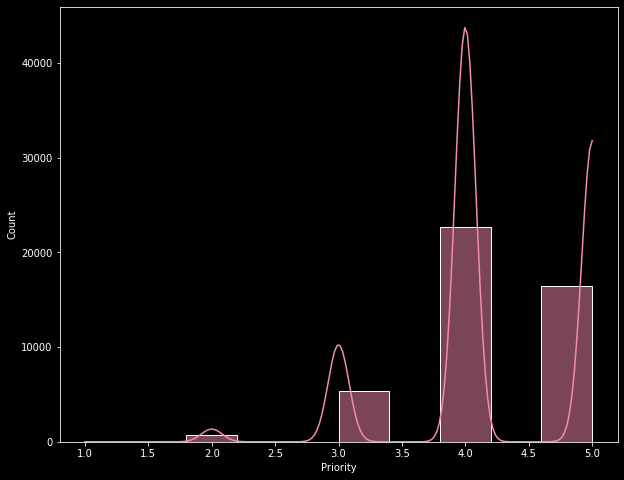

In [ ]:
#collapse
num_histplot('Priority', data)


		 📈📈📈 Boxplot of 'Priority'  📈📈📈



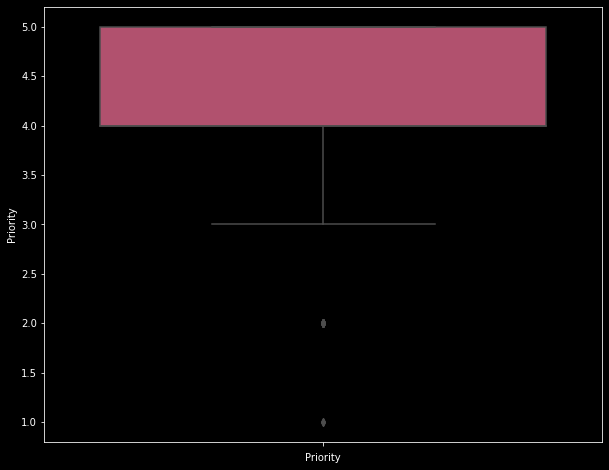


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 



,Parameters,Values
1,Skewness,-0.60
2,Kurtosis,0.13
3,Median,4.00
4,Count,45226.00
5,Mean,4.22
6,Stand. Dev.,0.71
7,Minimum,1.00
8,Q1 (25%),4.00
9,Q2 (50%),4.00
10,Q3 (75%),5.00


In [ ]:
#collapse
outliers_des('Priority', data)

### <font color=purple>Feature : number_cnt</font>


		     📈📈📈 Distribution of 'number_cnt' 📈📈📈



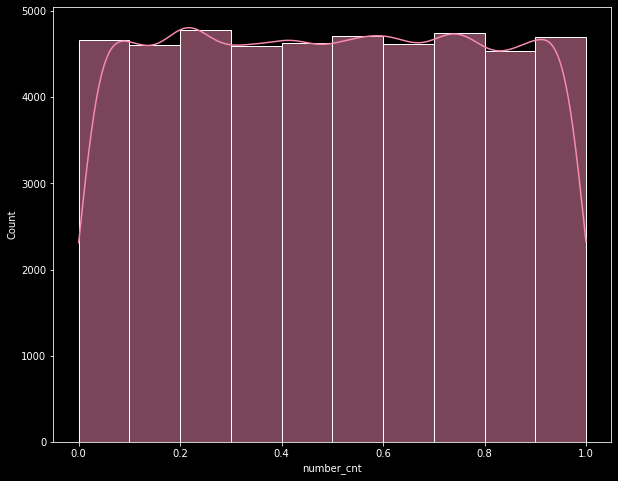

In [ ]:
#collapse
num_histplot('number_cnt', data)


		 📈📈📈 Boxplot of 'number_cnt'  📈📈📈



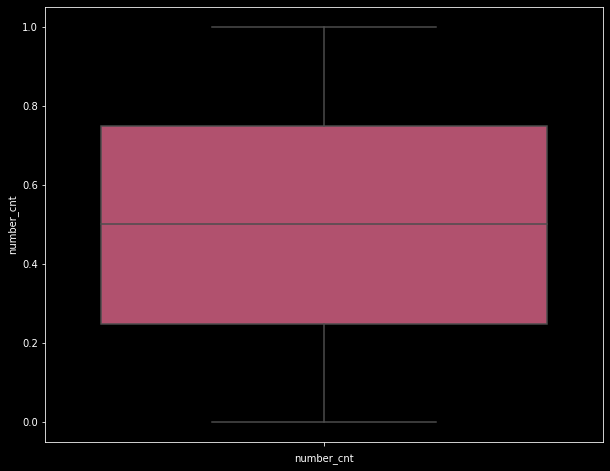


 ✔✔ 👍🏻👍🏻  NO Outliers  👍🏻👍🏻 ✔✔ 



,Parameters,Values
1,Skewness,0.00
2,Kurtosis,-1.20
3,Median,0.50
4,Count,46606.00
5,Mean,0.50
6,Stand. Dev.,0.29
7,Minimum,0.00
8,Q1 (25%),0.25
9,Q2 (50%),0.50
10,Q3 (75%),0.75


In [ ]:
#collapse
outliers_des('number_cnt', data)

### <font color=purple>Feature : No_of_Reassignments</font>


		     📈📈📈 Distribution of 'No_of_Reassignments' 📈📈📈



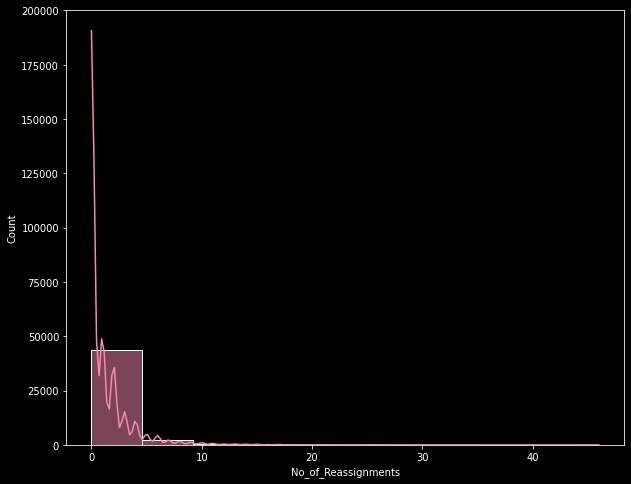

In [ ]:
#collapse
num_histplot('No_of_Reassignments', data)


		 📈📈📈 Boxplot of 'No_of_Reassignments'  📈📈📈



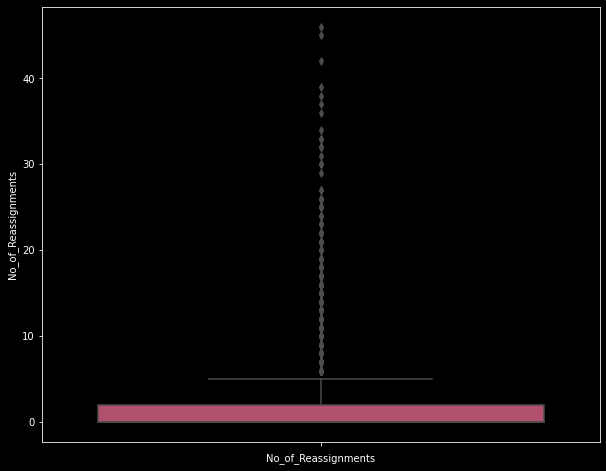


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 



,Parameters,Values
1,Skewness,4.83
2,Kurtosis,41.84
3,Median,0.00
4,Count,46605.00
5,Mean,1.13
6,Stand. Dev.,2.27
7,Minimum,0.00
8,Q1 (25%),0.00
9,Q2 (50%),0.00
10,Q3 (75%),2.00


In [ ]:
#collapse
outliers_des('No_of_Reassignments', data)

### <font color=purple>Feature : No_of_Related_Interactions</font>


		     📈📈📈 Distribution of 'No_of_Related_Interactions' 📈📈📈



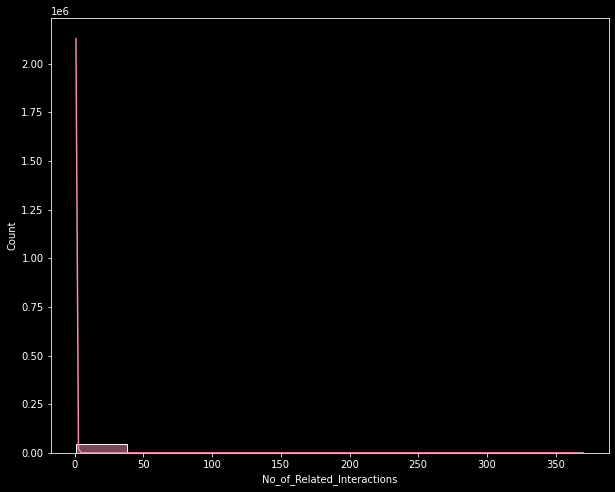

In [ ]:
#collapse
num_histplot('No_of_Related_Interactions', data)


		 📈📈📈 Boxplot of 'No_of_Related_Interactions'  📈📈📈



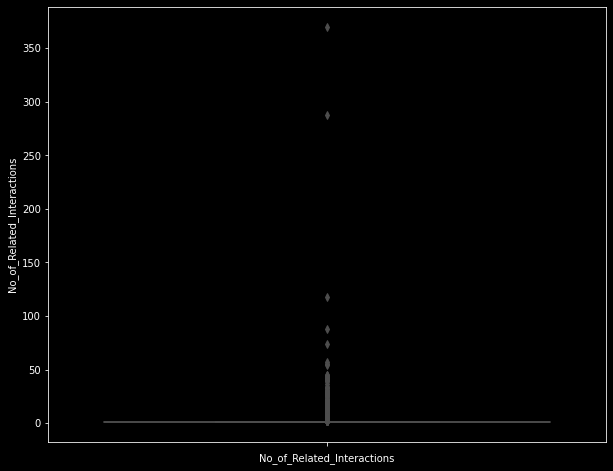


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 



,Parameters,Values
1,Skewness,100.82
2,Kurtosis,12906.37
3,Median,1.00
4,Count,46492.00
5,Mean,1.15
6,Stand. Dev.,2.56
7,Minimum,1.00
8,Q1 (25%),1.00
9,Q2 (50%),1.00
10,Q3 (75%),1.00


In [ ]:
#collapse
outliers_des('No_of_Related_Interactions', data)

### <font color=purple>Feature : No_of_Related_Incidents</font>


		     📈📈📈 Distribution of 'No_of_Related_Incidents' 📈📈📈



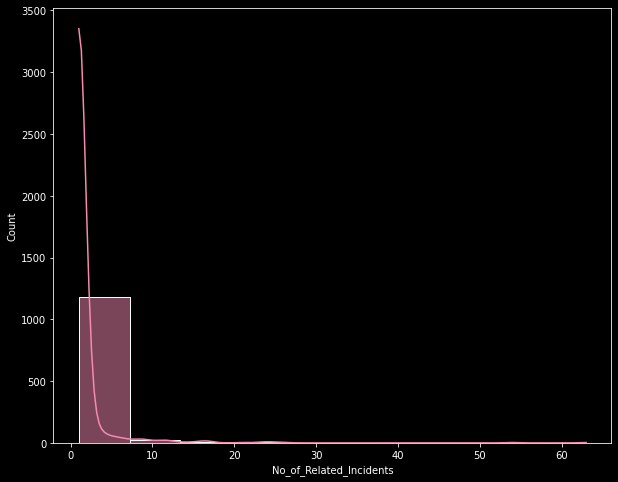

In [ ]:
#collapse
num_histplot('No_of_Related_Incidents', data)


		 📈📈📈 Boxplot of 'No_of_Related_Incidents'  📈📈📈



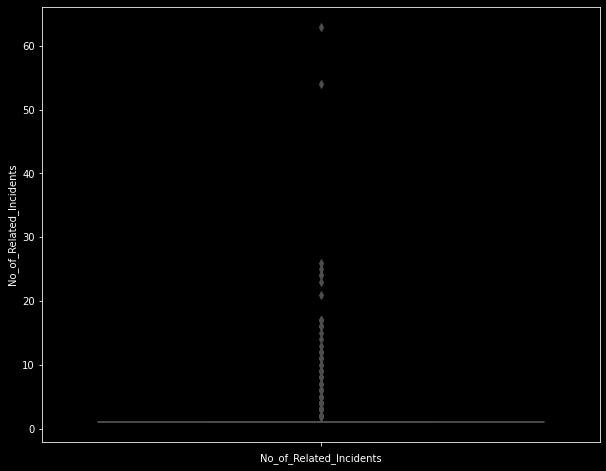


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 



,Parameters,Values
1,Skewness,10.56
2,Kurtosis,153.27
3,Median,1.00
4,Count,1222.00
5,Mean,1.67
6,Stand. Dev.,3.34
7,Minimum,1.00
8,Q1 (25%),1.00
9,Q2 (50%),1.00
10,Q3 (75%),1.00


In [ ]:
#collapse
outliers_des('No_of_Related_Incidents', data)

### <font color=purple>Feature : No_of_Related_Changes</font>


		     📈📈📈 Distribution of 'No_of_Related_Changes' 📈📈📈



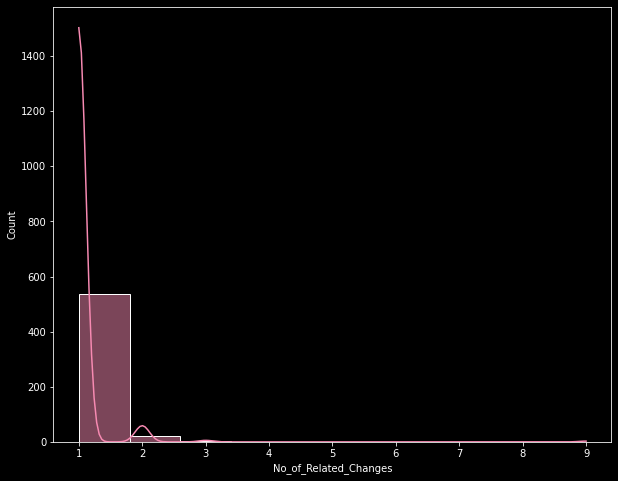

In [ ]:
#collapse
num_histplot('No_of_Related_Changes', data)


		 📈📈📈 Boxplot of 'No_of_Related_Changes'  📈📈📈



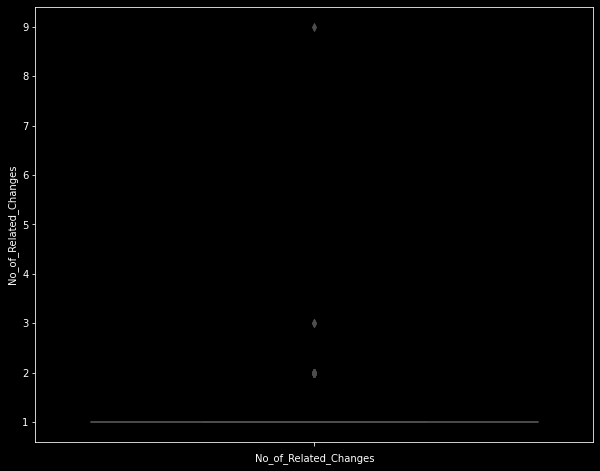


 ❌❌ 👎🏻👎🏻 Outliers Present 👎🏻👎🏻 ❌❌ 



,Parameters,Values
1,Skewness,14.55
2,Kurtosis,271.05
3,Median,1.00
4,Count,560.00
5,Mean,1.06
6,Stand. Dev.,0.40
7,Minimum,1.00
8,Q1 (25%),1.00
9,Q2 (50%),1.00
10,Q3 (75%),1.00


In [ ]:
#collapse
outliers_des('No_of_Related_Changes', data)

<font color=skyblue>In this dataset we will not remove outliers because they can represent some rare important data points in terms of high priority as it is a real-time dataset.</font>

# <font color=red>1. Predicting Priorities</font>

## <font color=green>EDA & Data Preprocessing for Predicting Priorities</font>

### <font color=blue>1. Feature Selection</font>

In [ ]:
#collapse
data1 = data.copy()
data1["priority"] = data1["Priority"]
data1 = data1.drop("Priority",axis=1)
data1.rename(columns={'priority': 'Priority'},inplace=True)
data1 = data1[['CI_Cat','CI_Subcat','WBS','Category','Priority']]

print('\nDataset after feature selection : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data1.head().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#610646'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_null(null_color='#CCB3C5')


Dataset after feature selection :  👇🏻👇🏻👇🏻



,CI_Cat,CI_Subcat,WBS,Category,Priority
0,subapplication,Web Based Application,WBS000162,incident,4.000000
1,application,Web Based Application,WBS000088,incident,3.000000
2,application,Desktop Application,WBS000092,request for information,nan
3,application,Web Based Application,WBS000088,incident,4.000000
4,application,Web Based Application,WBS000088,incident,4.000000


### <font color=blue>2. Relationship b/w categorical features and the target label</font>

In [ ]:
#collapse 
#finding the relationship b/w categorical variables and target label
categorical_features = [feature for feature in data1.columns if (data1[feature].dtypes=='O')]

def cat_countplot_wrt_Y(cat_feature,target, dataset):
    """
    Takes categorical feature and dataset as input and plots the countplot
    of the categorical feature w.r.t the target in decreasing order of the xalabel.
    
    """
    if cat_feature in categorical_features:
        print("\n\t\t    ",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3
              ,"Distribution of '{}' w.r.t '{}'".format(cat_feature,target)
              ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3)
        print("")

        plt.style.use('dark_background')
        plt.figure(figsize=(10,8))
        Y = dataset[cat_feature]
        total = len(Y)*1
        ax = sns.countplot(x=cat_feature,data=dataset, hue=dataset[target],order=dataset[cat_feature].value_counts().index, palette='hls')
        plt.xlabel(cat_feature, fontsize = 20)
        #put 11 ticks (for 10 steps), from 0 to the total number of rows in the dataframe
        ax.yaxis.set_ticks(np.linspace(0, total, 11))
        #adjust the ticklabel to the desired format, without changing the position of the ticks
        ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        # for p in ax.patches:
        #     ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+p.get_width() / 2., p.get_y() + p.get_height() + 20), ha='center',fontsize = 8,rotation=90)
    
        plt.show()
        
    else:
        print(emoji.emojize(":cross_mark:")*2
              ,"The entered feature is not categorical !!!!"
              ,emoji.emojize(":cross_mark:")*2)
           


### <font color=purple>Feature : CI_Cat</font>


		     📈📈📈 Distribution of 'CI_Cat' w.r.t 'Priority' 📈📈📈



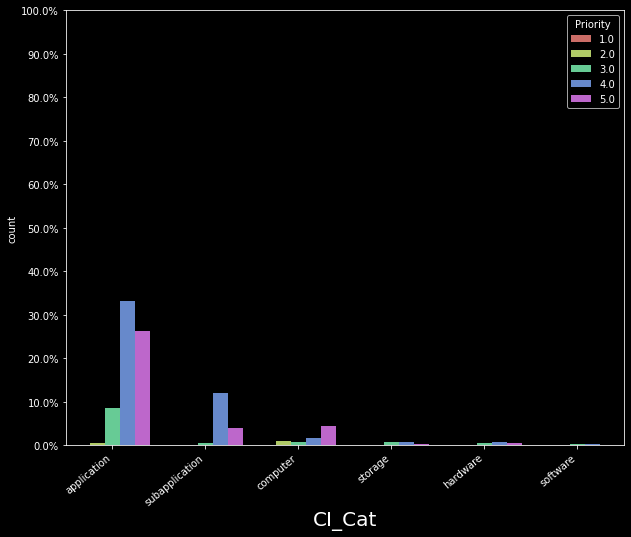

In [ ]:
#collapse
cat_countplot_wrt_Y('CI_Cat','Priority', data1)

### <font color=purple>Feature : CI_Subcat</font>


		     📈📈📈 Distribution of 'CI_Subcat' w.r.t 'Priority' 📈📈📈



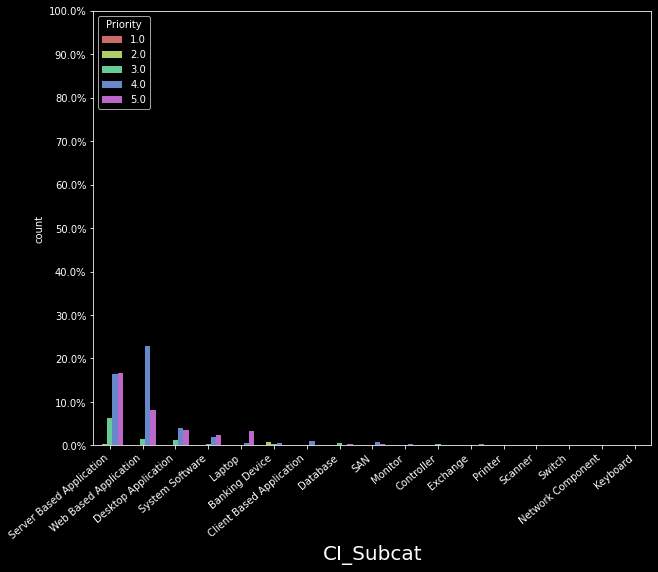

In [ ]:
#collapse
cat_countplot_wrt_Y('CI_Subcat','Priority', data1)

### <font color=purple>Feature : Category</font>


		     📈📈📈 Distribution of 'Category' w.r.t 'Priority' 📈📈📈



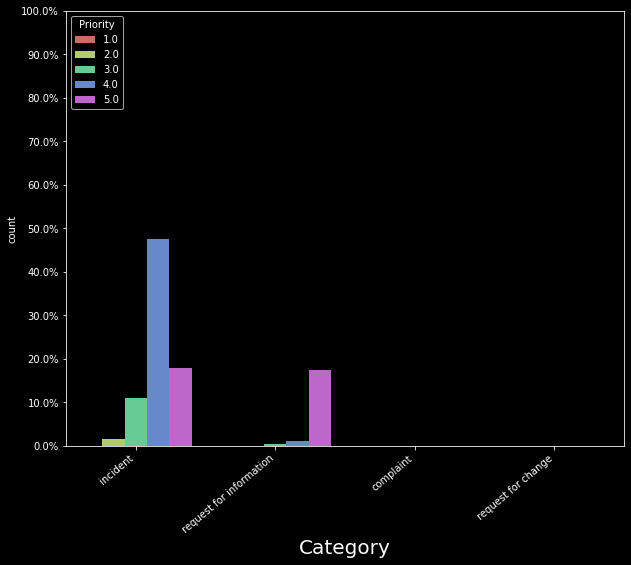

In [ ]:
#collapse
cat_countplot_wrt_Y('Category','Priority', data1)

### <font color=blue>3. Handling Missing Values</font>

In [ ]:
#collapse 
#getting total no. of 'unknown' values
print('\nMissing Values in the data : \n\n'
," ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data1.isnull().sum().to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A15F86'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Missing Values in the data : 

   👇🏻👇🏻👇🏻



,0
CI_Cat,111
CI_Subcat,0
WBS,0
Category,0
Priority,1380


In [ ]:
#collapse
# replacing Nan values
data1.CI_Cat.replace(np.nan, value='application', inplace=True)
data1.Priority.replace(np.nan,value=4,inplace=True)

#changing the type of Priority to int
data1['Priority']=data1['Priority'].astype('int64')

In [ ]:
#collapse
#checking for missing values
print("Missing values"
      ,emoji.emojize(":red_question_mark:")*2,"\n")
print(emoji.emojize(":check_mark_button:")*3
,"\n\n",data1.isnull().values.any()
,"\n\n",emoji.emojize(":check_mark_button:")*3)

Missing values ❓❓ 

✅✅✅ 

 False 

 ✅✅✅


### <font color=blue>4. Encoding the data</font>

In [ ]:
#collapse
print('\nEncoded Data : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

le_data1 = data1.copy()
le = LabelEncoder()
le_data1.CI_Cat = le.fit_transform(le_data1.CI_Cat)
le_data1.CI_Subcat = le.fit_transform(le_data1.CI_Subcat)
le_data1.WBS = le.fit_transform(le_data1.WBS)
le_data1.Category = le.fit_transform(le_data1.Category)

le_data1.head().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#932A06'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Encoded Data :  👇🏻👇🏻👇🏻



,CI_Cat,CI_Subcat,WBS,Category,Priority
0,5,16,137,1,4
1,0,16,70,1,3
2,0,4,74,3,4
3,0,16,70,1,4
4,0,16,70,1,4


### <font color=blue>5. Balanced Dataset ???</font>

In [ ]:
#collapse
# Dividing the label encoded dataset into independent and dependent variables
X = le_data1.iloc[:, : -1].values
y = le_data1.iloc[:, -1].values


Priority=4, n=24097 (51.704%)
Priority=3, n=5323 (11.421%)
Priority=5, n=16486 (35.373%)
Priority=2, n=697 (1.496%)
Priority=1, n=3 (0.006%)
 


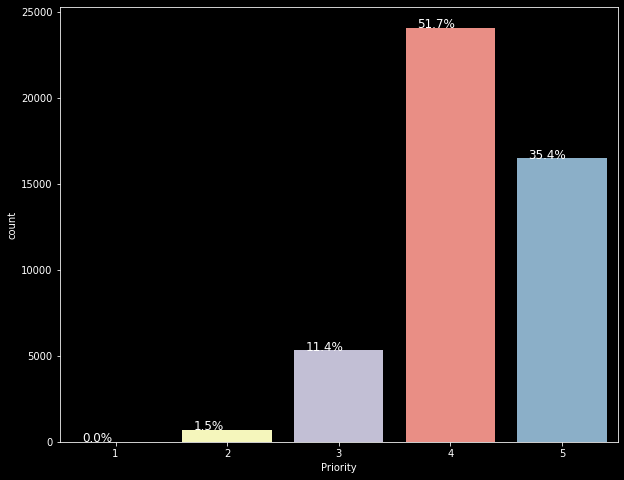

In [ ]:
#collapse
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Priority=%d, n=%d (%.3f%%)' % (k, v, per))
 
print(" ") 
# plot the distribution
plt.figure(figsize=(10,8))
plt.style.use('dark_background')
total = len(le_data1['Priority'])*1
ax=sns.countplot(x='Priority',data=le_data1)
for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), fontsize = 12)


### <font color=blue>6. Splitting the data into train & test and Balncing the dataset</font>

In [ ]:
#collapse
# Splitting into train & test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

print(emojis.encode(":scissors:")*22
      ,"\n\nData divided into Dependent & Independent Variables\nand Split into Train & Test data\n\n"
      ,emojis.encode(":scissors:")*22)


✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️ 

Data divided into Dependent & Independent Variables
and Split into Train & Test data

 ✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️


Priority=5, n=16893 (20.0%)
Priority=4, n=16893 (20.0%)
Priority=3, n=16893 (20.0%)
Priority=2, n=16893 (20.0%)
Priority=1, n=16893 (20.0%)
 


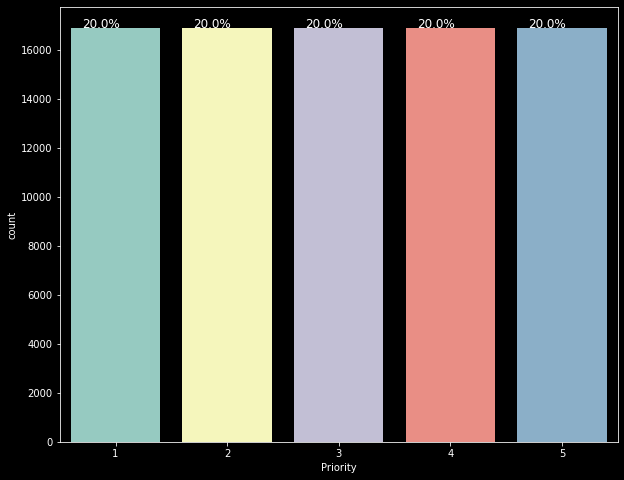

In [ ]:
#collapse
# transform the dataset
oversample = SMOTE(kind='regular',k_neighbors=2)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Priority=%d, n=%d (%.1f%%)' % (k, v, per))
 
print(" ")

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
train = pd.concat([X_train,y_train], axis=1)
train.columns = ['0','1','2','3','Priority']
# plot the distribution
plt.figure(figsize=(10,8))
plt.style.use('dark_background')
total = len(train['Priority'])*1
ax=sns.countplot(x='Priority',data=train)
for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), fontsize = 12)


### <font color=blue>7. Feature Scaling</font>

In [ ]:
#collapse
# Standardization in the label encoded data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(emoji.emojize(":triangular_flag:")*18
      ,"\n\nSuccessfully accomplished feature scaling\n\n"
      ,emoji.emojize(":triangular_flag:")*18)

🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩 

Successfully accomplished feature scaling

 🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩


In [ ]:
#collapse
#convert array into dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

print(emoji.emojize(":thumbs_up_light_skin_tone:")*26
      ,"\n\nX_train,X_test,y_train & y_test converted into dataframe\n\n"
      ,emoji.emojize(":thumbs_up_light_skin_tone:")*26)

👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻 

X_train,X_test,y_train & y_test converted into dataframe

 👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻


## <font color=green>Building Models</font>

In [ ]:
#collapse
# Confusion Matrix
def confusion_mat(model, classes, feature):
  """
  Takes y_test & y_pred of a model as input and return styler object
   of accuracy, precision,recall & F1 Score for that particular model.

  """
  #Plotting the confusion matrix
  cm = confusion_matrix(y_test,model.predict(X_test))
  # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
  cm_df = pd.DataFrame(cm,index=classes, columns=classes)
  print("Confusion Matrix : "
  ,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3,"\n")
  plt.style.use('seaborn-pastel')
  plt.figure(figsize=(10,8))
  sns.heatmap(cm_df,annot=True,fmt='d')
  plt.ylabel('Actual {} Values'.format(feature))
  plt.xlabel('Predicted {} Values'.format(feature))
  plt.show()
  print("")

  result = pd.DataFrame(classification_report(model.predict(X_test), 
                                        y_test, digits=2,
                                        output_dict=True)).T

  result['support'] = result.support.apply(int)
  result = result.style.set_table_styles(
            [{'selector': 'th',
              'props': [('background', '#34495E'),
                        ('color', 'white'),
                        ('font-family', 'verdana'),
                        ('font-size', '10pt')]},
   
             {'selector': 'td',
              'props': [('font-family', 'verdana'),
                        ('padding','0em 0em')]},
            
             {'selector': 'tr:nth-of-type(odd)',
              'props': [('background', '#ABB2B9'),
                        ('color', 'black')]},
  
             {'selector': 'tr:nth-of-type(even)',
              'props': [('background', 'white'),
                        ('color', 'black')]},
 
             {'selector': 'tr:hover',
              'props': [('background-color', 'pink')]},
 
             {'selector': 'th:hover',
              'props': [('font-size', '18pt')]},
   
            {'selector': 'tr:hover td:hover',
             'props': [('max-width', '1000px'),
                       ('font-size', '18pt')]}

          ]
          ).set_properties(**{'background-color': '#FEF5E7'}, subset=['precision','recall','f1-score'])\
          .set_precision(2)\
          .set_properties(**{'background-color': '#D5B9AE'},subset=pd.IndexSlice['accuracy', :'f1-score'])\
          .set_properties(**{'background-color': '#E8F7E8'},subset=pd.IndexSlice['macro avg':'weighted avg', :'f1-score'])



  return result    

### <font color=blue>1. Random Forest</font>

In [ ]:
#collapse
# Training the model on the label encoded training set
model1 = RandomForestClassifier(max_depth=27)
model1 = model1.fit(X_train,y_train)

Confusion Matrix :  👇🏻👇🏻👇🏻 



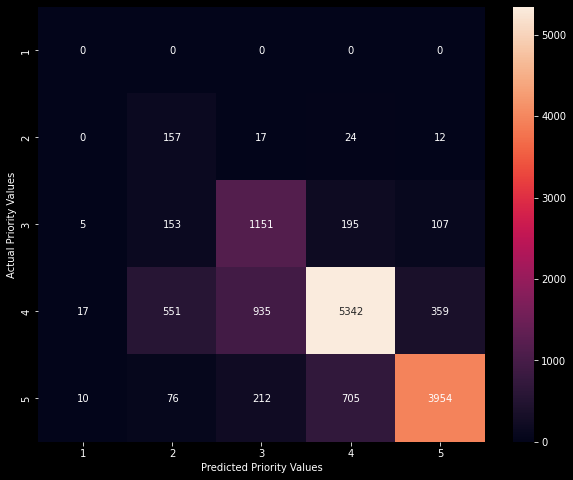

,precision,recall,f1-score,support
1,0.00,0.00,0.00,32
2,0.75,0.17,0.27,937
3,0.71,0.50,0.59,2315
4,0.74,0.85,0.79,6266
5,0.80,0.89,0.84,4432
accuracy,0.76,0.76,0.76,0
macro avg,0.60,0.48,0.50,13982
weighted avg,0.75,0.76,0.74,13982


In [ ]:
#collapse
classes = ['1','2','3','4','5']
confusion_mat(model1, classes, 'Priority')

### <font color=blue>2. K-NN</font>

In [ ]:
#collapse
# Training the model on the label encoded training set
model2 = KNeighborsClassifier(n_neighbors=12,metric='euclidean')
model2 = model2.fit(X_train,y_train)

Confusion Matrix :  👇🏻👇🏻👇🏻 



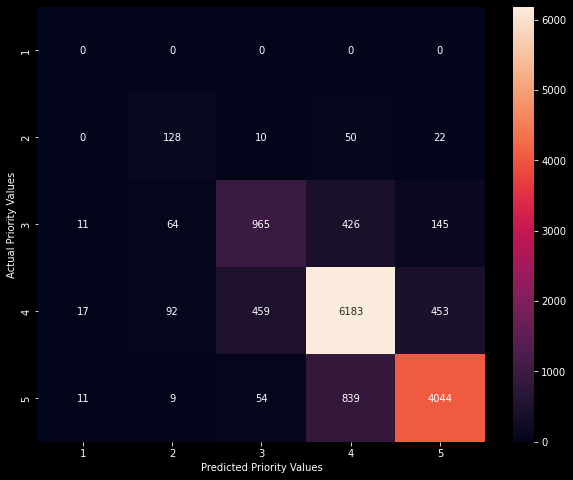

,precision,recall,f1-score,support
1,0.00,0.00,0.00,39
2,0.61,0.44,0.51,293
3,0.60,0.65,0.62,1488
4,0.86,0.82,0.84,7498
5,0.82,0.87,0.84,4664
accuracy,0.81,0.81,0.81,0
macro avg,0.58,0.56,0.56,13982
weighted avg,0.81,0.81,0.81,13982


In [ ]:
#collapse
classes = ['1','2','3','4','5']
confusion_mat(model2, classes,'Priority')

### <font color=blue>3. XGBoost Classifier</font>

In [ ]:
#collapse
# Training the model on the label encoded training set
model3 = XGBClassifier()
model3 = model3.fit(X_train,y_train)

Confusion Matrix :  👇🏻👇🏻👇🏻 



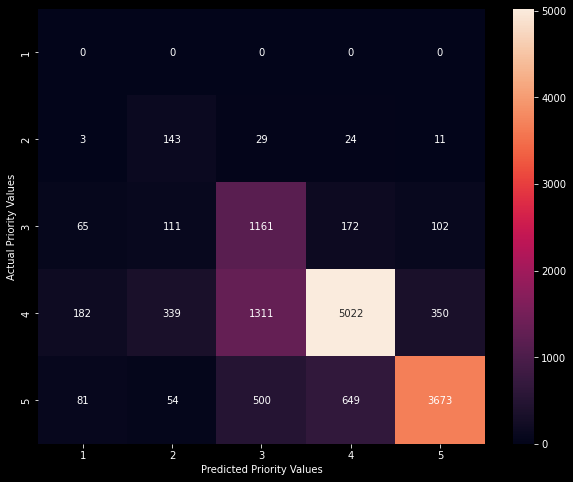

,precision,recall,f1-score,support
1,0.00,0.00,0.00,331
2,0.68,0.22,0.33,647
3,0.72,0.39,0.50,3001
4,0.70,0.86,0.77,5867
5,0.74,0.89,0.81,4136
accuracy,0.72,0.72,0.72,0
macro avg,0.57,0.47,0.48,13982
weighted avg,0.70,0.72,0.68,13982


In [ ]:
#collapse
classes = ['1','2','3','4','5']
confusion_mat(model3, classes,'Priority')

# <font color=red>2. Predicting Request For Change (RFC)</font>

## <font color=green>Data Preprocessing for RFC</font>

### <font color=blue>1. Feature Selection</font>

In [ ]:
#collapse
data2 = data.copy()
data2["no_of_Related_Changes"] = data2["No_of_Related_Changes"]
data2 = data2.drop("No_of_Related_Changes",axis=1)
data2.rename(columns={'no_of_Related_Changes': 'No_of_Related_Changes'},inplace=True)
data2 = data2[['CI_Cat','CI_Subcat','WBS','Category','Priority','No_of_Related_Interactions','No_of_Related_Incidents','No_of_Related_Changes']]

print('\nDataset after feature selection : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data2.head().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#610646'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_null(null_color='#CCB3C5')


Dataset after feature selection :  👇🏻👇🏻👇🏻



,CI_Cat,CI_Subcat,WBS,Category,Priority,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,subapplication,Web Based Application,WBS000162,incident,4.000000,1.000000,2.000000,nan
1,application,Web Based Application,WBS000088,incident,3.000000,1.000000,1.000000,nan
2,application,Desktop Application,WBS000092,request for information,nan,1.000000,nan,nan
3,application,Web Based Application,WBS000088,incident,4.000000,1.000000,nan,nan
4,application,Web Based Application,WBS000088,incident,4.000000,1.000000,nan,nan


### <font color=blue>2. Handling Missing Values</font>

In [ ]:
#collapse 
#getting total no. of 'unknown' values
print('\nMissing Values in the data : \n\n'
," ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data2.isnull().sum().to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A15F86'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Missing Values in the data : 

   👇🏻👇🏻👇🏻



,0
CI_Cat,111
CI_Subcat,0
WBS,0
Category,0
Priority,1380
No_of_Related_Interactions,114
No_of_Related_Incidents,45384
No_of_Related_Changes,46046


In [ ]:
#collapse
# replacing Nan values
data2.CI_Cat.replace(np.nan, value='application', inplace=True)
data2.Priority.replace(np.nan,value=4,inplace=True)
#changing the type of Priority to int
data2['Priority']=data2['Priority'].astype('int64')
data2.No_of_Related_Interactions.replace(np.nan,value=1,inplace=True)
data2.No_of_Related_Incidents.replace(np.nan,value=0,inplace=True)
data2.No_of_Related_Changes.replace(np.nan,value=0,inplace=True)

In [ ]:
#collapse
#checking for missing values
print("Missing values"
      ,emoji.emojize(":red_question_mark:")*2,"\n")
print(emoji.emojize(":check_mark_button:")*3
,"\n\n",data2.isnull().values.any()
,"\n\n",emoji.emojize(":check_mark_button:")*3)

Missing values ❓❓ 

✅✅✅ 

 False 

 ✅✅✅


### <font color=blue>3. Encoding the data</font>

In [ ]:
#collapse
print('\nEncoded Data : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

le_data2 = data2.copy()
le = LabelEncoder()
le_data2.CI_Cat = le.fit_transform(le_data2.CI_Cat)
le_data2.CI_Subcat = le.fit_transform(le_data2.CI_Subcat)
le_data2.WBS = le.fit_transform(le_data2.WBS)
le_data2.Category = le.fit_transform(le_data2.Category)
le_data2.No_of_Related_Interactions = le.fit_transform(le_data2.No_of_Related_Interactions)
le_data2.No_of_Related_Incidents = le.fit_transform(le_data2.No_of_Related_Incidents)
le_data2.No_of_Related_Changes = le.fit_transform(le_data2.No_of_Related_Changes)

le_data2.head().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#932A06'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Encoded Data :  👇🏻👇🏻👇🏻



,CI_Cat,CI_Subcat,WBS,Category,Priority,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,16,137,1,4,0,2,0
1,0,16,70,1,3,0,1,0
2,0,4,74,3,4,0,0,0
3,0,16,70,1,4,0,0,0
4,0,16,70,1,4,0,0,0


### <font color=blue>4. Balanced Dataset ???</font>

No. of Related Changes=0, n=46046 (98.8%)
No. of Related Changes=1, n=536 (1.2%)
No. of Related Changes=2, n=21 (0.0%)
No. of Related Changes=3, n=2 (0.0%)
No. of Related Changes=4, n=1 (0.0%)
 


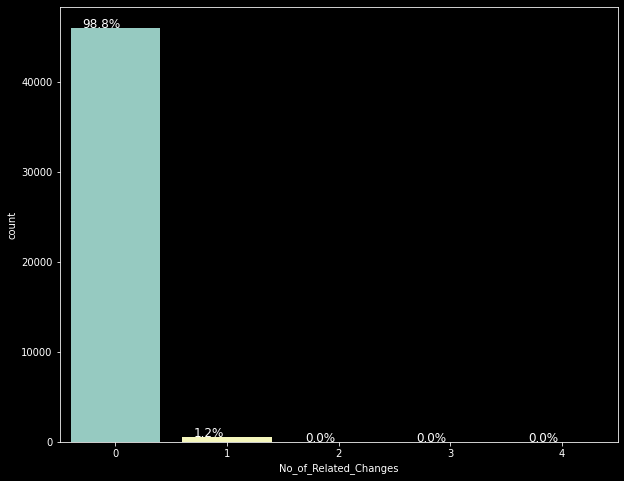

In [ ]:
#collapse
# summarize distribution
counter = Counter(le_data2['No_of_Related_Changes'])
for k,v in counter.items():
	per = v / len(le_data2['No_of_Related_Changes']) * 100
	print('No. of Related Changes=%d, n=%d (%.1f%%)' % (k, v, per))
 
print(" ") 
# plot the distribution
plt.figure(figsize=(10,8))
plt.style.use('dark_background')
total = len(le_data2['No_of_Related_Changes'])*1
ax=sns.countplot(x='No_of_Related_Changes',data=le_data2)
for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), fontsize = 12)


In [ ]:
#collapse
data1= le_data2
data2=data1[data1.No_of_Related_Changes==1]
data3=data1[data1.No_of_Related_Changes==2]
data4=data1[data1.No_of_Related_Changes==3]
data5=data1[data1.No_of_Related_Changes==4]

for _ in itertools.repeat(None, 85):
  data1=pd.concat([data1, data2, data3, data4, data5])
    
bal_data=data1    

No. of Related Changes=0, n=46046 (48.9%)
No. of Related Changes=1, n=46096 (48.9%)
No. of Related Changes=2, n=1806 (1.9%)
No. of Related Changes=3, n=172 (0.2%)
No. of Related Changes=4, n=86 (0.1%)
 


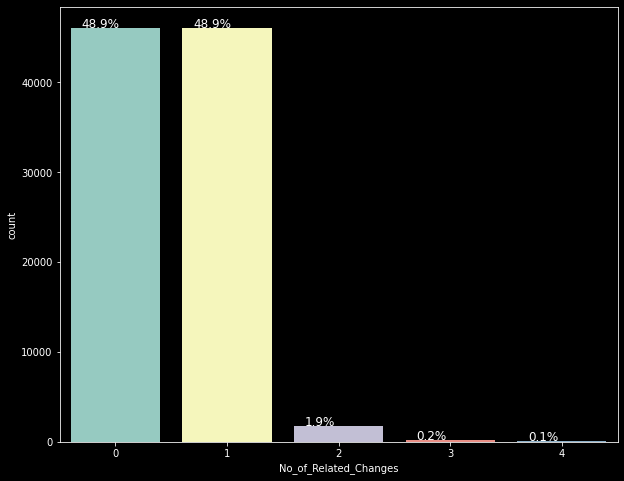

In [ ]:
#collapse
# summarize distribution
counter = Counter(bal_data['No_of_Related_Changes'])
for k,v in counter.items():
	per = v / len(bal_data['No_of_Related_Changes']) * 100
	print('No. of Related Changes=%d, n=%d (%.1f%%)' % (k, v, per))
 
print(" ") 
# plot the distribution
plt.figure(figsize=(10,8))
plt.style.use('dark_background')
total = len(bal_data['No_of_Related_Changes'])*1
ax=sns.countplot(x='No_of_Related_Changes',data=bal_data)
for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), fontsize = 12)


### <font color=blue>5. Splitting the data into train & test & Balancing the data</font>

In [ ]:
#collapse
# Dividing the label encoded dataset into independent and dependent variables
X = bal_data.iloc[:, : -1].values
y = bal_data.iloc[:, -1].values

# Splitting into train & test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

print(emojis.encode(":scissors:")*22
      ,"\n\nData divided into Dependent & Independent Variables\nand Split into Train & Test data\n\n"
      ,emojis.encode(":scissors:")*22)


✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️ 

Data divided into Dependent & Independent Variables
and Split into Train & Test data

 ✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️


No. of Related Changes=1, n=32317 (20.0%)
No. of Related Changes=2, n=32317 (20.0%)
No. of Related Changes=0, n=32317 (20.0%)
No. of Related Changes=3, n=32317 (20.0%)
No. of Related Changes=4, n=32317 (20.0%)
 


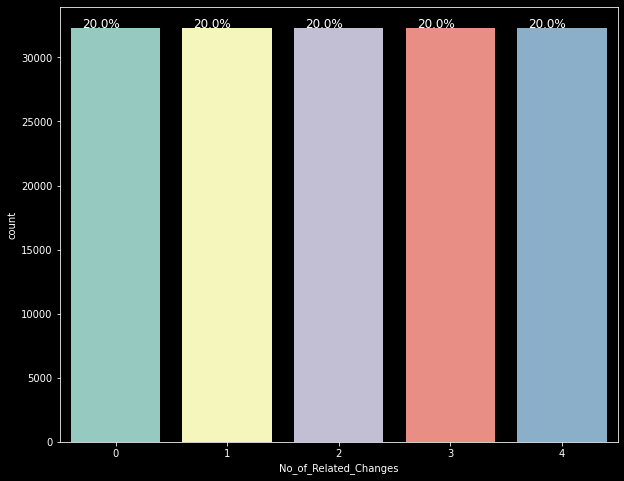

In [ ]:
#collapse
# transform the dataset
oversample = SMOTE(kind='regular',k_neighbors=2)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('No. of Related Changes=%d, n=%d (%.1f%%)' % (k, v, per))
 
print(" ")

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
train = pd.concat([X_train,y_train], axis=1)
train.columns = ['0','1','2','3','4','5','6','No_of_Related_Changes']
# plot the distribution
plt.figure(figsize=(10,8))
plt.style.use('dark_background')
total = len(train['No_of_Related_Changes'])*1
ax=sns.countplot(x='No_of_Related_Changes',data=train)
for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), fontsize = 12)


### <font color=blue>5. Feature Scaling</font>

In [ ]:
#collapse
# Standardization in the label encoded data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(emoji.emojize(":triangular_flag:")*18
      ,"\n\nSuccessfully accomplished feature scaling\n\n"
      ,emoji.emojize(":triangular_flag:")*18)

🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩 

Successfully accomplished feature scaling

 🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩


In [ ]:
#collapse
#convert array into dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

print(emoji.emojize(":thumbs_up_light_skin_tone:")*26
      ,"\n\nX_train,X_test,y_train & y_test converted into dataframe\n\n"
      ,emoji.emojize(":thumbs_up_light_skin_tone:")*26)

👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻 

X_train,X_test,y_train & y_test converted into dataframe

 👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻


## <font color=green>Building Models</font>

### <font color=blue>1. Random Forest</font>

In [ ]:
#collapse
# Training the model on the label encoded training set
model4 = RandomForestClassifier()
model4 = model4.fit(X_train,y_train)

Confusion Matrix :  👇🏻👇🏻👇🏻 



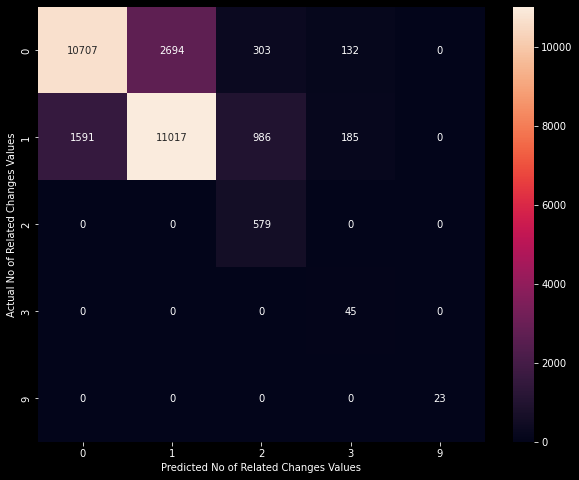

,precision,recall,f1-score,support
0,0.77,0.87,0.82,12298
1,0.80,0.80,0.80,13711
2,1.00,0.31,0.47,1868
3,1.00,0.12,0.22,362
4,1.00,1.00,1.00,23
accuracy,0.79,0.79,0.79,0
macro avg,0.91,0.62,0.66,28262
weighted avg,0.80,0.79,0.78,28262


In [ ]:
#collapse
classes = ['0','1','2','3','9']
confusion_mat(model4, classes, 'No of Related Changes' )

### <font color=blue>2. K-NN</font>

In [ ]:
#collapse
# Training the model on the label encoded training set
model5 = KNeighborsClassifier(n_neighbors=12,metric='euclidean')
model5 = model5.fit(X_train,y_train)

Confusion Matrix :  👇🏻👇🏻👇🏻 



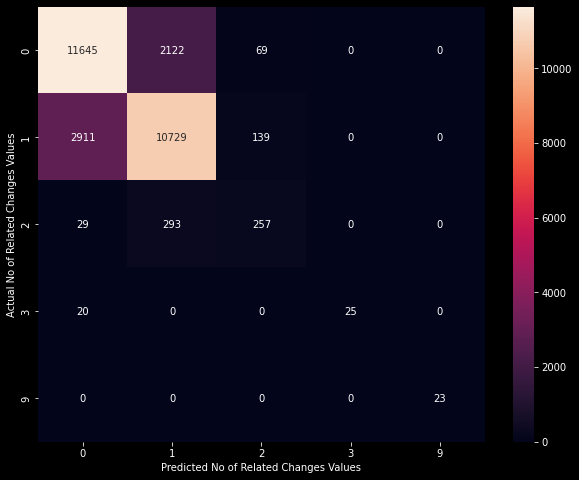

,precision,recall,f1-score,support
0,0.84,0.80,0.82,14605
1,0.78,0.82,0.80,13144
2,0.44,0.55,0.49,465
3,0.56,1.00,0.71,25
4,1.00,1.00,1.00,23
accuracy,0.80,0.80,0.80,0
macro avg,0.72,0.83,0.76,28262
weighted avg,0.81,0.80,0.80,28262


In [ ]:
#collapse
classes = ['0','1','2','3','9']
confusion_mat(model5, classes,'No of Related Changes')

### <font color=blue>3. XGBoost Classifier</font>

In [ ]:
#collapse
# Training the model on the label encoded training set
model6 = XGBClassifier()
model6 = model6.fit(X_train,y_train)

Confusion Matrix :  👇🏻👇🏻👇🏻 



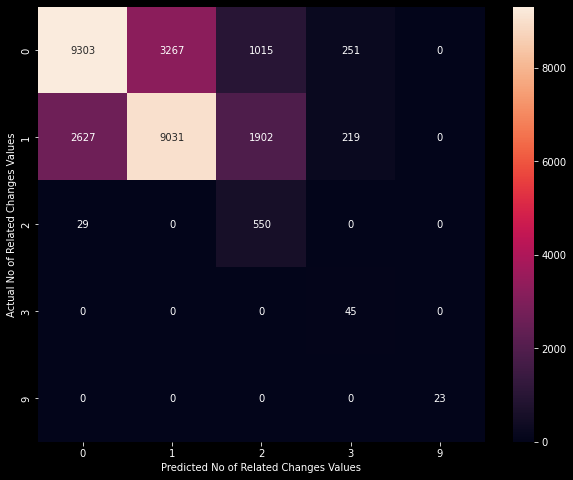

,precision,recall,f1-score,support
0,0.67,0.78,0.72,11959
1,0.66,0.73,0.69,12298
2,0.95,0.16,0.27,3467
3,1.00,0.09,0.16,515
4,1.00,1.00,1.00,23
accuracy,0.67,0.67,0.67,0
macro avg,0.86,0.55,0.57,28262
weighted avg,0.71,0.67,0.64,28262


In [ ]:
#collapse
classes = ['0','1','2','3','9']
confusion_mat(model6, classes,'No of Related Changes')

# <font color=red>3. Forecasting the Incident Volume</font>

📝📝 <font color=skyblue>We are going to do time series analysis and forecasting for Incident volume.</font>

## <font color=green>Data Preprocessing for Forecasting Incident Volume</font>

📝📝 <font color=skyblue>This step includes feature selection,handling missing values , handling duplicate valuess, Indexing with time series data, Visualizing Incident time series data.</font>

### <font color=blue>1. Feature Selection</font>

In [ ]:
#collapse
#different values of the feature Category
data.Category.value_counts().to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#436C3A'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)

,Category
incident,37748
request for information,8846
complaint,11
request for change,1


In [ ]:
#collapse
# select only the incident values 
Incident = data.loc[data['Category'] == 'incident']
# reset index
Incident = Incident.reset_index()
# removing the index column
Incident.drop('index',axis=1,inplace=True)
#glimpse of dataset
Incident.head().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#261655'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_max(color='#0074FF',axis=0)\
.highlight_min(color='#00FFE5',axis=0)\
.highlight_null(null_color='#CCB3C5')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.000000,0.601292,incident,KM0000553,closed,26.000000,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,"3,87,16,91,111",Other,1.000000,SD0000007,2.000000,nan,nan
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.000000,0.415050,incident,KM0000611,closed,33.000000,2012-12-03 15:44:00,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,"4,35,47,86,389",Software,1.000000,SD0000011,1.000000,nan,nan
2,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.000000,0.642927,incident,KM0000611,closed,13.000000,2012-07-17 11:49:00,NaT,2013-11-14 09:31:00,2013-11-14 09:31:00,"4,32,18,33,333",Operator error,1.000000,SD0000025,nan,nan,nan
3,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.000000,0.345258,incident,KM0000611,closed,2.000000,2012-10-08 11:01:00,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,"3,38,39,03,333",Other,1.000000,SD0000029,nan,nan,nan
4,WBA000124,application,Web Based Application,WBS000088,IM0000013,Closed,4,4,4.000000,0.006676,incident,KM0000611,closed,4.000000,2012-10-08 11:27:00,NaT,2013-08-11 13:54:00,2013-08-11 13:54:00,"3,38,34,36,944",Other,1.000000,SD0000031,nan,nan,nan


In [ ]:
#collapse 
#finding the no. of rows and cols
print("\nAfter selecting only 'incident' values from the Category feature : \n\n"
,"\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

print('Number of rows and columns :', Incident.shape)


After selecting only 'incident' values from the Category feature : 

 	 👇🏻👇🏻👇🏻

Number of rows and columns : (37748, 25)


In [ ]:
#collapse 
#finding starting & ending point of Series
print("\nFinding starting & ending point of Series : \n\n"
,"\t",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

print('The time series starts from: ', Incident['Open_Time'].min())
print('The time series ends on: ', Incident['Open_Time'].max())


Finding starting & ending point of Series : 

 	 👇🏻👇🏻👇🏻

The time series starts from:  2012-01-10 10:49:00
The time series ends on:  2014-12-03 22:58:00


In [ ]:
#collapse 
# feature selection
data3 = Incident[['Incident_ID','Open_Time']]

print('\nDataset after feature selection : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data3.head().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#610646'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_null(null_color='#CCB3C5')


Dataset after feature selection :  👇🏻👇🏻👇🏻



,Incident_ID,Open_Time
0,IM0000004,2012-05-02 13:32:00
1,IM0000005,2012-12-03 15:44:00
2,IM0000011,2012-07-17 11:49:00
3,IM0000012,2012-10-08 11:01:00
4,IM0000013,2012-10-08 11:27:00


In [ ]:
#collapse
# selecting only date from datetime
data3['Open_Time'] = [datetime.datetime.date(d) for d in data3['Open_Time']]

# calculating no. of incidents
data3['Incidents_Count'] = data3.groupby('Open_Time')['Incident_ID'].transform('count')

#removing the Incident_ID column
data3.drop(['Incident_ID'],axis=1,inplace=True)

# Removing the duplicates
data3.drop_duplicates(inplace=True)

#glimpse of dataset
data3.head().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#053975'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_null(null_color='#CCB3C5')

,Open_Time,Incidents_Count
0,2012-05-02,1
1,2012-12-03,1
2,2012-07-17,1
3,2012-10-08,2
5,2012-08-15,1


### <font color=blue>2. Handling Missing Values</font>

In [ ]:
#collapse
#checking for missing values
print("Missing values"
      ,emoji.emojize(":red_question_mark:")*2,"\n")
print(emoji.emojize(":check_mark_button:")*3
,"\n\n",data3.isnull().values.any()
,"\n\n",emoji.emojize(":check_mark_button:")*3)

Missing values ❓❓ 

✅✅✅ 

 False 

 ✅✅✅


### <font color=blue>3. Indexing with Time Series Data</font>

In [ ]:
#collapse
# set Open_Time as index
data3 = data3.set_index('Open_Time')
# converting index into datetime datatype
data3.index = pd.to_datetime(data3.index).normalize()
data3.index

DatetimeIndex(['2012-05-02', '2012-12-03', '2012-07-17', '2012-10-08',
               '2012-08-15', '2012-08-22', '2012-08-29', '2012-03-09',
               '2012-09-21', '2012-01-10',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=319, freq=None)

In [ ]:
#collapse
# glimpse of dataset
data3.head().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#117A65'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)

,Incidents_Count
Open_Time,
2012-05-02 00:00:00,1
2012-12-03 00:00:00,1
2012-07-17 00:00:00,1
2012-10-08 00:00:00,2
2012-08-15 00:00:00,1


### <font color=blue>4. Visulaizing Incident Volume Time Series Data</font>

In [ ]:
#collapse
# Making a new Series with frequency as Day
new_data3 = data3['Incidents_Count']
new_data3 = new_data3.asfreq('D')
new_data3.index

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06', '2012-05-07', '2012-05-08', '2012-05-09',
               '2012-05-10', '2012-05-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=699, freq='D')

In [ ]:
#collapse
new_data3.head()

Open_Time
2012-05-02    1.0
2012-05-03    NaN
2012-05-04    NaN
2012-05-05    NaN
2012-05-06    NaN
Freq: D, Name: Incidents_Count, dtype: float64

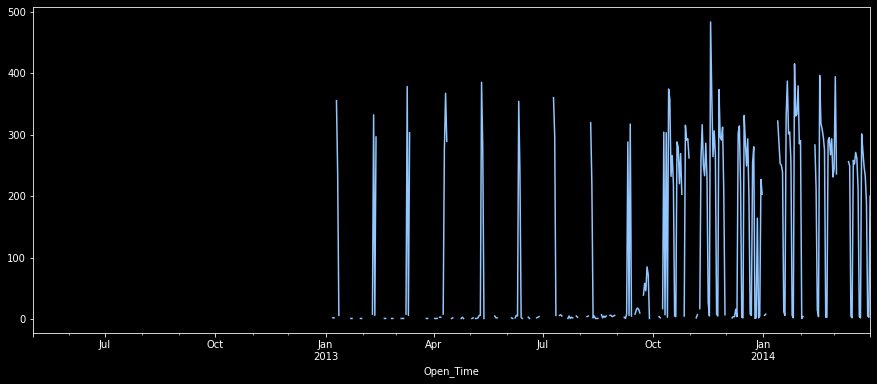

In [ ]:
#collapse
# Plotting number of tickets per day
new_data3.plot(figsize=(15,6))
plt.show()

📝📝 <font color=skyblue>Since there are no tickets before Jan 2013, we will consider only the latter values.</font>

In [ ]:
#collapse
#selecting data after 22-11-2012
new_data = data3[data3.index > datetime.datetime(2012,11,22)]

In [ ]:
#collapse
new_data.head()

,Incidents_Count
Open_Time,
2012-12-03,1
2012-12-24,1
2013-01-15,1
2013-01-22,1
2013-01-23,1


In [ ]:
#collapse
#resampling data on the basis of their mean
final_data = new_data['Incidents_Count'].resample('MS').mean()

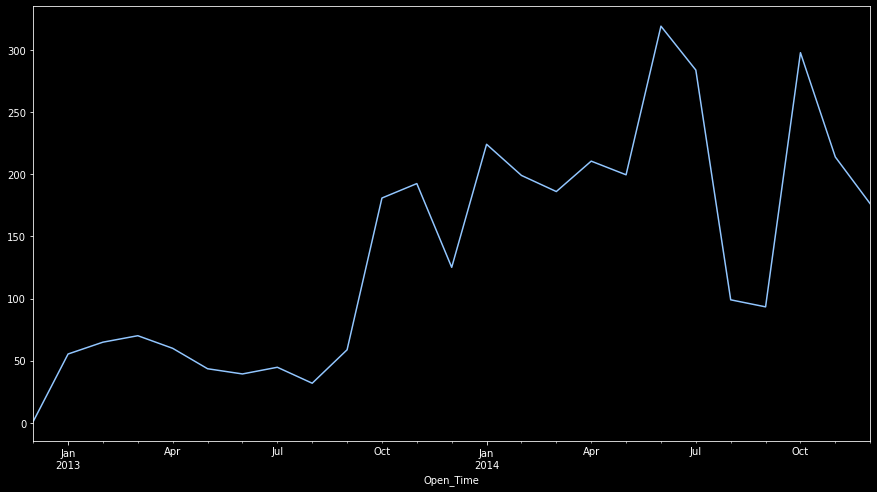

In [ ]:
#collapse
#plotting the data
final_data.plot(figsize=(15,8))
plt.show()

📝📝 <font color=skyblue>The time series has seasonality pattern, such as no. of incidents are low in Q1 and in Q2, Q3 it increases.</font>

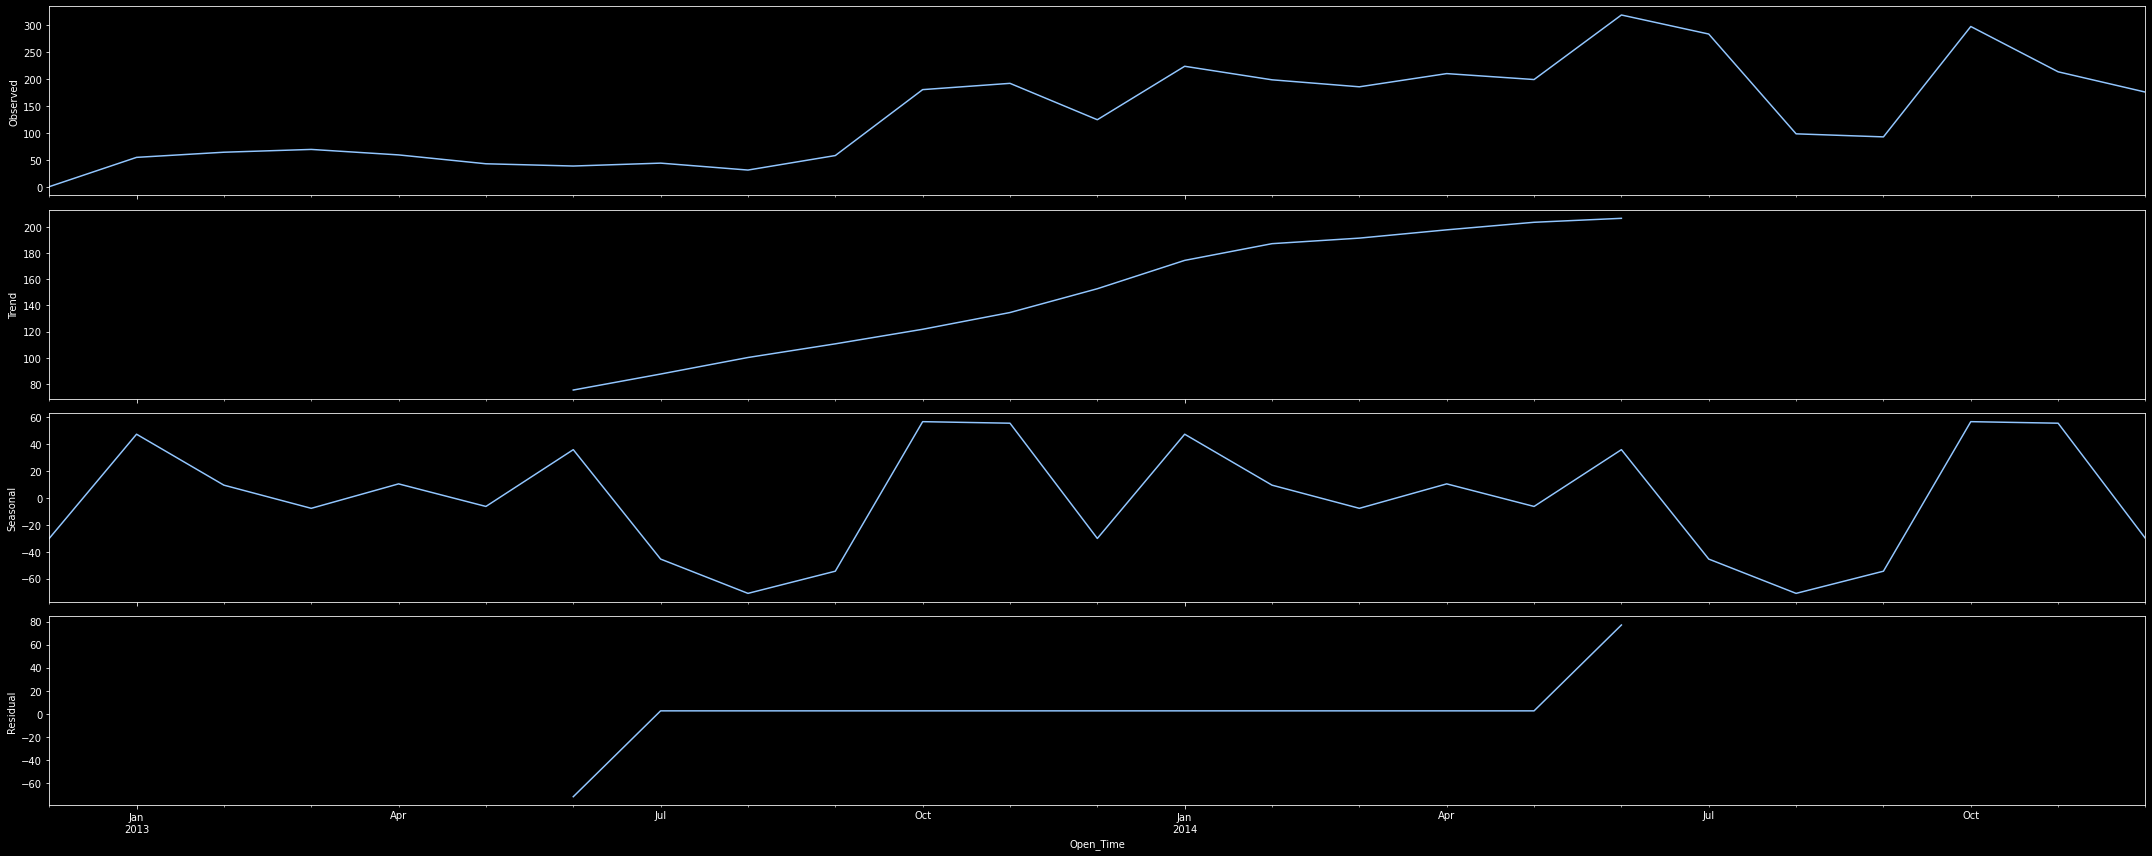

In [ ]:
#collapse
from pylab import rcParams
rcParams['figure.figsize'] = 30, 12

decomposition = sm.tsa.seasonal_decompose(final_data, model='additive')
fig = decomposition.plot()
plt.show()

📝📝 <font color=skyblue>We have also visualized our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.</font>

## <font color=green>Time Series Forecasting with ARIMA (Annually)</font>

### <font color=blue>1. Parameter Selection for th ARIMA Time Series Model</font>

In [ ]:
#collapse
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(final_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:316.39373838465093
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:156.0986204206173
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:165.6452901793945
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-17.187973863531113
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:283.8089455263696
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:135.519652836575
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:157.91129207730262


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-6.887641767931035
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:266.43725485560327
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:129.1237933044825
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:141.37259951644384
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:254.45437626065186
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:120.07917908219572
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:143.3677303040736
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:278.69440637578884
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:140.89022457454678
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:141.89782669076627
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:266.96212558436935
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:131.63354421721834
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:143.7186421419928
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:267.99804728939836
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:131.0212882028846
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:132.7604484538496
ARIMA(1, 1, 1)x(0, 0, 0, 12

In [ ]:
#collapse
mod = sm.tsa.statespace.SARIMAX(final_data,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                    Incidents_Count   No. Observations:                   25
Model:             SARIMAX(1, 1, 1)x(0, 1, 0, 12)   Log Likelihood                 -57.421
Date:                            Tue, 21 Sep 2021   AIC                            120.841
Time:                                    16:18:48   BIC                            121.749
Sample:                                12-01-2012   HQIC                           119.845
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5625      0.450      1.250      0.211      -0.319       1.444
ma.L1         -1.0000      0.538   

### <font color=blue>2. Validating Forecast</font>

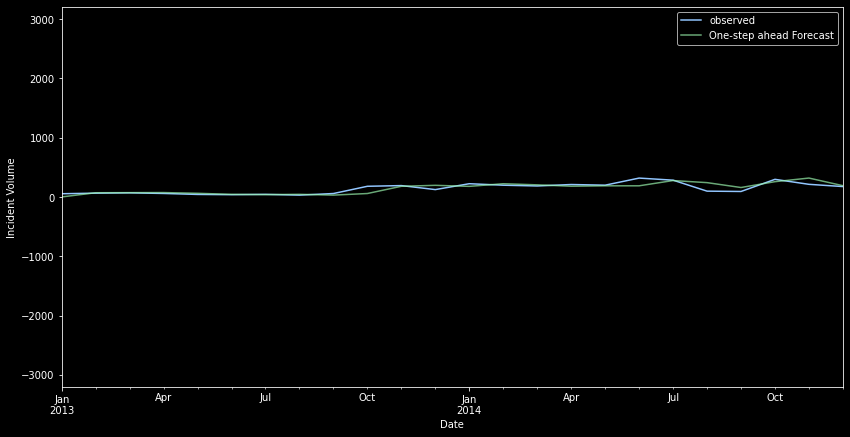

In [ ]:
#collapse
pred = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = final_data['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Incident Volume')
plt.legend()

plt.show()

In [ ]:
#collapse
data_forecasted = pred.predicted_mean
data_truth = final_data['2013-01-01':]

# Compute the mean square error
mse = ((data_forecasted - data_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3486.74


In [ ]:
#collapse
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 59.05


### <font color=blue>3. Producing &Visualizing Forecasts</font>

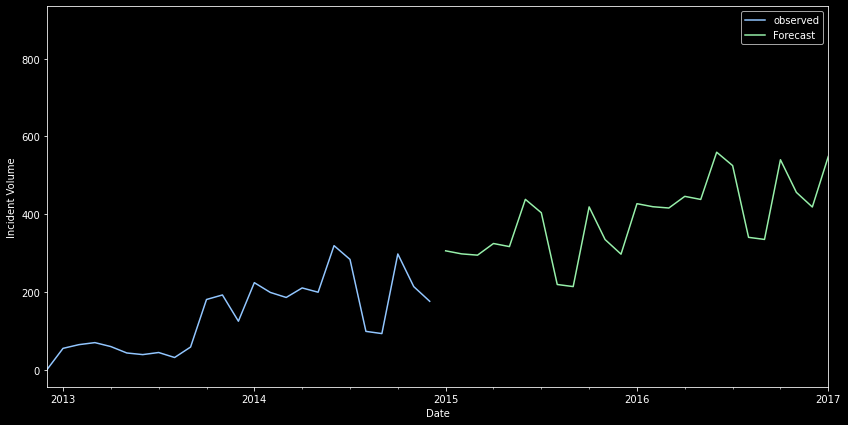

In [ ]:
#collapse
pred_uc = results.get_forecast(steps=25)
pred_ci = pred_uc.conf_int()

ax = final_data.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Incident Volume')

plt.legend()
plt.show()


## <font color=green>Time Series Forecasting with ARIMA (Quarterly)</font>

### <font color=blue>1. Parameter Selection for th ARIMA Time Series Model</font>

In [ ]:
#collapse
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(final_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 4)4 - AIC:316.39373838465093
ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:255.37767619798117
ARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:236.93000935138286
ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:194.73493708192063
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:250.13145722198652
ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:237.91253322761114
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:205.60639540229724
ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:195.84240594761826
ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:283.8089455263696
ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:233.13322406043483
ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:223.39874002689007
ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:180.52641941970492
ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:247.32024701084868
ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:223.67220399809233
ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:201.91177262084858
ARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:182.29613543620925
ARIMA(0, 1, 0)x(0, 0, 0, 4)4 - AIC:266.43725485560327
ARIMA(0, 1, 0)x(0, 0, 1, 4)4 - AIC:225.3819679262831
ARIMA(0, 1, 0)x(0, 1, 0, 4)4 -

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 4)4 - AIC:213.3323539304074
ARIMA(0, 1, 1)x(0, 1, 0, 4)4 - AIC:216.30914816200297
ARIMA(0, 1, 1)x(0, 1, 1, 4)4 - AIC:166.2104219120311
ARIMA(0, 1, 1)x(1, 0, 0, 4)4 - AIC:234.4292744802634
ARIMA(0, 1, 1)x(1, 0, 1, 4)4 - AIC:214.46989815150351
ARIMA(0, 1, 1)x(1, 1, 0, 4)4 - AIC:189.9054616862799
ARIMA(0, 1, 1)x(1, 1, 1, 4)4 - AIC:168.17993545251738
ARIMA(1, 0, 0)x(0, 0, 0, 4)4 - AIC:278.69440637578884
ARIMA(1, 0, 0)x(0, 0, 1, 4)4 - AIC:237.1986655220372
ARIMA(1, 0, 0)x(0, 1, 0, 4)4 - AIC:235.09752123378084
ARIMA(1, 0, 0)x(0, 1, 1, 4)4 - AIC:189.78359770257177
ARIMA(1, 0, 0)x(1, 0, 0, 4)4 - AIC:236.31106839148785
ARIMA(1, 0, 0)x(1, 0, 1, 4)4 - AIC:233.02132802918524
ARIMA(1, 0, 0)x(1, 1, 0, 4)4 - AIC:189.31768991726977
ARIMA(1, 0, 0)x(1, 1, 1, 4)4 - AIC:191.06589744040738
ARIMA(1, 0, 1)x(0, 0, 0, 4)4 - AIC:266.96212558436935
ARIMA(1, 0, 1)x(0, 0, 1, 4)4 - AIC:226.1267536150369
ARIMA(1, 0, 1)x(0, 1, 0, 4)4 - AIC:224.90993277936428
ARIMA(1, 0, 1)x(0, 1, 1, 4)4 - AIC

In [ ]:
#collapse
mod = sm.tsa.statespace.SARIMAX(final_data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                   Incidents_Count   No. Observations:                   25
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -79.719
Date:                           Tue, 21 Sep 2021   AIC                            169.438
Time:                                   16:18:52   BIC                            172.634
Sample:                               12-01-2012   HQIC                           169.143
                                    - 12-01-2014                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2882      0.687      0.419      0.675      -1.059       1.635
ma.L1         -0.7202      0.603     -1.194

### <font color=blue>2. Validating Forecast</font>

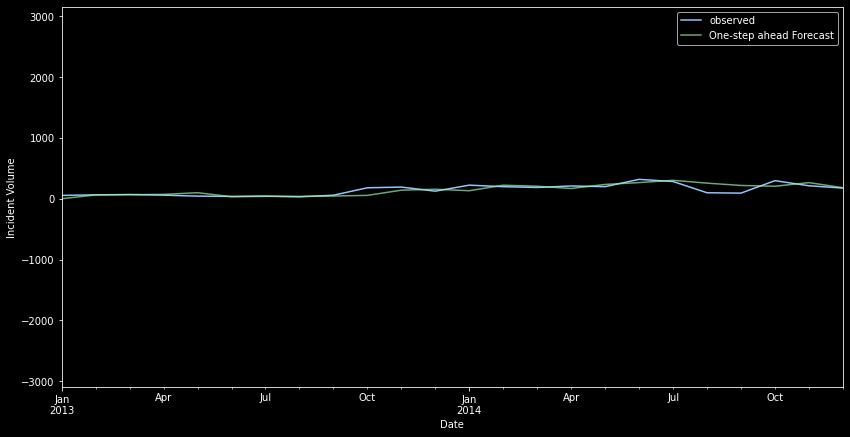

In [ ]:
#collapse
pred = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = final_data['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Incident Volume')
plt.legend()

plt.show()

In [ ]:
#collapse
data_forecasted = pred.predicted_mean
data_truth = final_data['2013-01-01':]

# Compute the mean square error
mse = ((data_forecasted - data_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3893.36


In [ ]:
#collapse
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 62.4


### <font color=blue>3. Producing &Visualizing Forecasts</font>

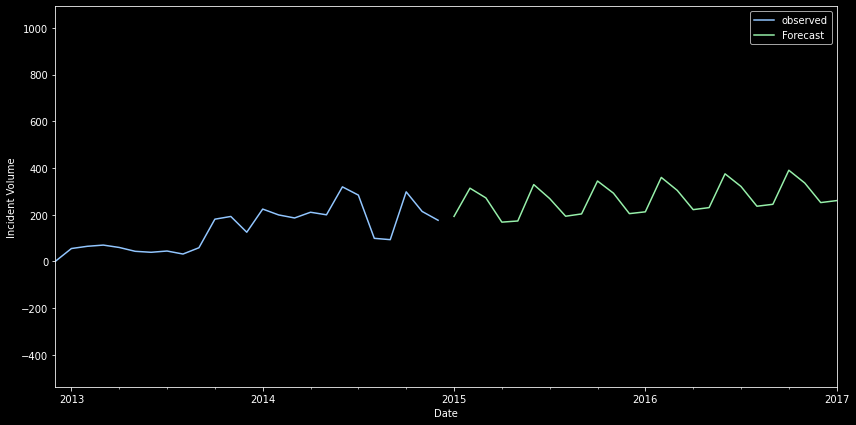

In [ ]:
#collapse
pred_uc = results.get_forecast(steps=25)
pred_ci = pred_uc.conf_int()

ax = final_data.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Incident Volume')

plt.legend()
plt.show()


# <font color=red>4. Auto Tagging the tickets with right departments</font>

## <font color=green>Data Preprocessing for Auto Tagging</font>

### <font color=blue>1. Feature Selection</font>

In [ ]:
#collapse
data4 = data.copy()
data4 = data4[['CI_Cat','CI_Subcat','WBS','Category','Priority']]

print('\nDataset after feature selection : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data4.head().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#610646'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
).highlight_null(null_color='#CCB3C5')


Dataset after feature selection :  👇🏻👇🏻👇🏻



,CI_Cat,CI_Subcat,WBS,Category,Priority
0,subapplication,Web Based Application,WBS000162,incident,4.000000
1,application,Web Based Application,WBS000088,incident,3.000000
2,application,Desktop Application,WBS000092,request for information,nan
3,application,Web Based Application,WBS000088,incident,4.000000
4,application,Web Based Application,WBS000088,incident,4.000000


### <font color=blue>2. Relationship b/w categorical features and the target label</font>

### <font color=purple>Feature : CI_Subcat</font>


		     📈📈📈 Distribution of 'CI_Subcat' w.r.t 'CI_Cat' 📈📈📈



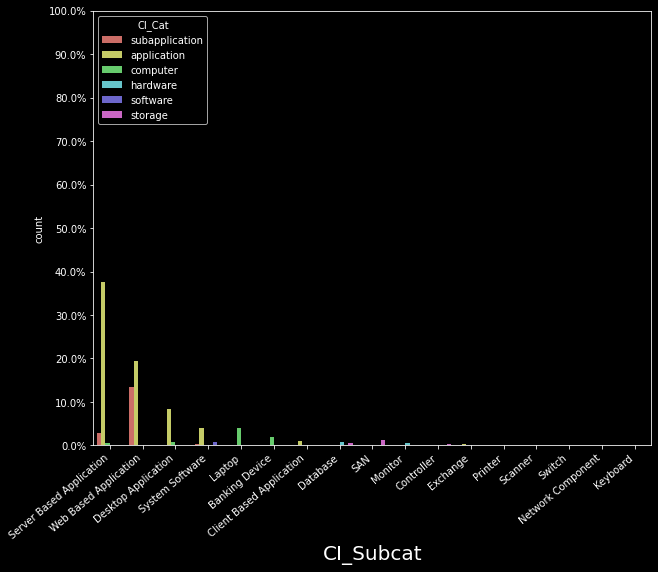

In [ ]:
#collapse
cat_countplot_wrt_Y('CI_Subcat','CI_Cat', data4)

### <font color=purple>Feature : Category</font>


		     📈📈📈 Distribution of 'Category' w.r.t 'CI_Cat' 📈📈📈



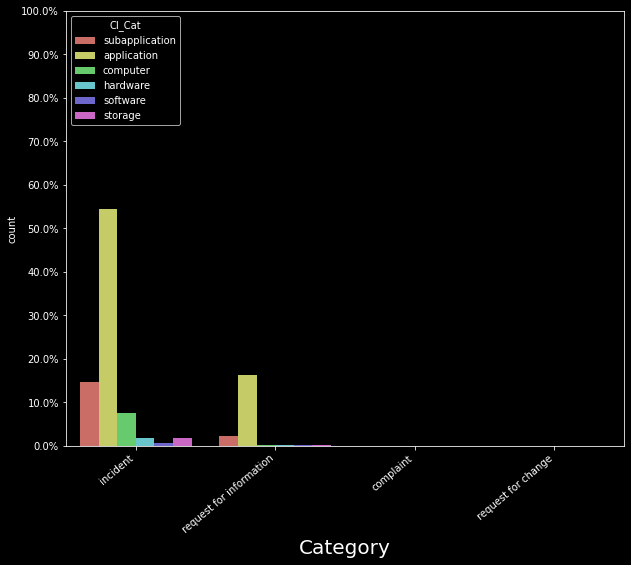

In [ ]:
#collapse
cat_countplot_wrt_Y('Category','CI_Cat', data4)

### <font color=blue>3. Relationship b/w numerical features and the target label</font>

### <font color=purple>Feature : Priority</font>

In [ ]:
#collapse 
numerical_features = [feature for feature in data4.columns if (data4[feature].dtypes!='O')]

def num_boxplot_wrt_Y(feature,target, dataset):
    """
    It takes the numerical variable and dataset as input and plots the boxplot 
    w.r.t target for the particular.
    
    """
    if feature in numerical_features:
        print("\n\t\t",emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3
              ,"Boxplot of '{}' w.r.t '{}'".format(feature,target)
              ,emoji.emojize(":chart_with_upwards_trend:", use_aliases=True)*3)
        print("")
        #plotting the boxplot
        plt.style.use('dark_background')
        plt.figure(figsize=(10,8))
        sns.boxplot(x=dataset[target],y=dataset[feature] , data=dataset, palette='flare')
        plt.xlabel(feature)
        plt.show()



		 📈📈📈 Boxplot of 'Priority' w.r.t 'CI_Cat' 📈📈📈



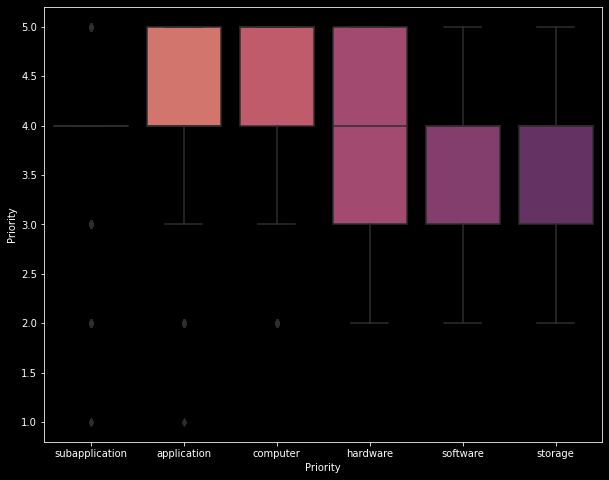

In [ ]:
#collapse 
num_boxplot_wrt_Y('Priority','CI_Cat', data4)

### <font color=blue>4. Handling Missing Values</font>

In [ ]:
#collapse 
#getting total no. of 'unknown' values
print('\nMissing Values in the data : \n\n'
," ",emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

data4.isnull().sum().to_frame().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#A15F86'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Missing Values in the data : 

   👇🏻👇🏻👇🏻



,0
CI_Cat,111
CI_Subcat,0
WBS,0
Category,0
Priority,1380


In [ ]:
#collapse
# replacing Nan values
data4.CI_Cat.replace(np.nan, value='application', inplace=True)
data4.Priority.replace(np.nan,value=4,inplace=True)

#changing the type of Priority to int
data4['Priority']=data4['Priority'].astype('int64')

In [ ]:
#collapse
#checking for missing values
print("Missing values"
      ,emoji.emojize(":red_question_mark:")*2,"\n")
print(emoji.emojize(":check_mark_button:")*3
,"\n\n",data4.isnull().values.any()
,"\n\n",emoji.emojize(":check_mark_button:")*3)

Missing values ❓❓ 

✅✅✅ 

 False 

 ✅✅✅


### <font color=blue>4. Encoding the data</font>

In [ ]:
#collapse
print('\nEncoded Data : '
,emoji.emojize(":backhand_index_pointing_down_light_skin_tone:")*3)
print("")

le_data4 = data4.copy()
le = LabelEncoder()
le_data4.CI_Cat = le.fit_transform(le_data4.CI_Cat)
le_data4.CI_Subcat = le.fit_transform(le_data4.CI_Subcat)
le_data4.WBS = le.fit_transform(le_data4.WBS)
le_data4.Category = le.fit_transform(le_data4.Category)

le_data4.head().style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#932A06'),
            ('color', 'white'),
            ('font-family', 'verdana'),
            ('font-size', '10pt')]},
   
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('padding','0em 0em')]},
            
 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#ABB2B9'),
            ('color', 'black')]},
  
  {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white'),
            ('color', 'black')]},
 
  {'selector': 'tr:hover',
   'props': [('background-color', 'pink')]},
 
  {'selector': 'th:hover',
    'props': [('font-size', '18pt')]},
   
   {'selector': 'tr:hover td:hover',
    'props': [('max-width', '1000px'),
              ('font-size', '18pt')]}

]
)


Encoded Data :  👇🏻👇🏻👇🏻



,CI_Cat,CI_Subcat,WBS,Category,Priority
0,5,16,137,1,4
1,0,16,70,1,3
2,0,4,74,3,4
3,0,16,70,1,4
4,0,16,70,1,4


### <font color=blue>5. Balanced Dataset ???</font>

In [ ]:
#collapse
# Dividing the label encoded dataset into independent and dependent variables
X = le_data4.iloc[:, 1: ].values
y = le_data4.iloc[:, 0].values


Category=5, n=7787 (16.708%)
Category=0, n=33011 (70.830%)
Category=1, n=3643 (7.817%)
Category=2, n=915 (1.963%)
Category=3, n=333 (0.715%)
Category=4, n=917 (1.968%)
 


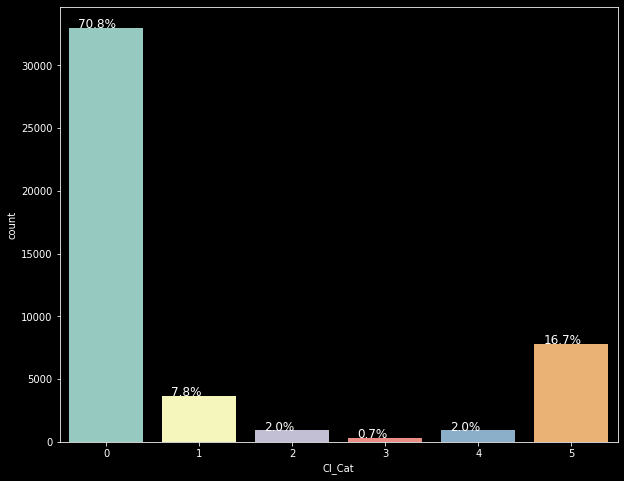

In [ ]:
#collapse
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Category=%d, n=%d (%.3f%%)' % (k, v, per))
 
print(" ") 
# plot the distribution
plt.figure(figsize=(10,8))
plt.style.use('dark_background')
total = len(le_data4['CI_Cat'])*1
ax=sns.countplot(x='CI_Cat',data=le_data4)
for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), fontsize = 12)


### <font color=blue>6. Splitting the data into train & test and Balancing the data</font>

In [ ]:
#collapse
# Splitting into train & test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

print(emojis.encode(":scissors:")*22
      ,"\n\nData divided into Dependent & Independent Variables\nand Split into Train & Test data\n\n"
      ,emojis.encode(":scissors:")*22)


✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️ 

Data divided into Dependent & Independent Variables
and Split into Train & Test data

 ✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️✂️


Category=5, n=23096 (16.7%)
Category=0, n=23096 (16.7%)
Category=2, n=23096 (16.7%)
Category=4, n=23096 (16.7%)
Category=1, n=23096 (16.7%)
Category=3, n=23096 (16.7%)
 


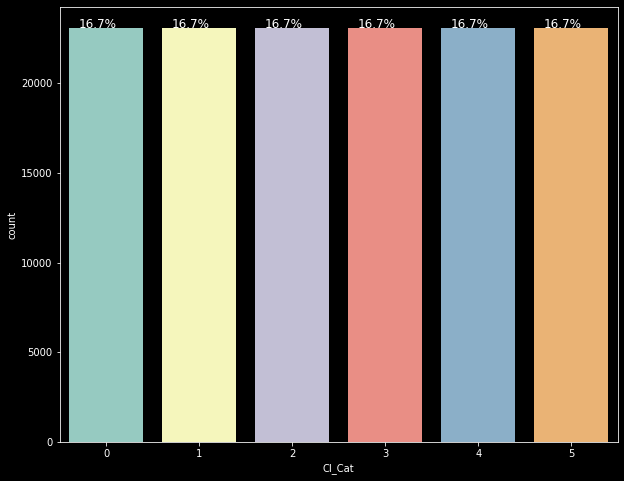

In [ ]:
#collapse
# transform the dataset
oversample = SMOTE(kind='regular',k_neighbors=2)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Category=%d, n=%d (%.1f%%)' % (k, v, per))
 
print(" ")

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
train = pd.concat([X_train,y_train], axis=1)
train.columns = ['0','1','2','3','CI_Cat']
# plot the distribution
plt.figure(figsize=(10,8))
plt.style.use('dark_background')
total = len(train['CI_Cat'])*1
ax=sns.countplot(x='CI_Cat',data=train)
for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5), fontsize = 12)


### <font color=blue>7. Feature Scaling</font>

In [ ]:
#collapse
# Standardization in the label encoded data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(emoji.emojize(":triangular_flag:")*18
      ,"\n\nSuccessfully accomplished feature scaling\n\n"
      ,emoji.emojize(":triangular_flag:")*18)

🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩 

Successfully accomplished feature scaling

 🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩


In [ ]:
#collapse
#convert array into dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

print(emoji.emojize(":thumbs_up_light_skin_tone:")*26
      ,"\n\nX_train,X_test,y_train & y_test converted into dataframe\n\n"
      ,emoji.emojize(":thumbs_up_light_skin_tone:")*26)

👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻 

X_train,X_test,y_train & y_test converted into dataframe

 👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻


## <font color=green>Building Models</font>

### <font color=blue>1. Random Forest</font>

In [ ]:
#collapse
# Training the model on the label encoded training set
model7 = RandomForestClassifier(max_depth=27)
model7 = model7.fit(X_train,y_train)

Confusion Matrix :  👇🏻👇🏻👇🏻 



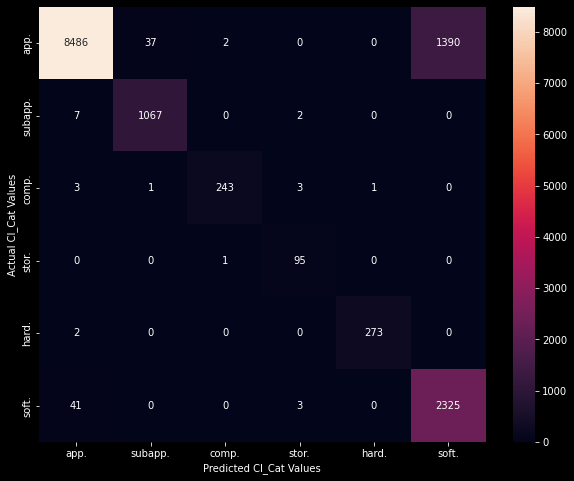

,precision,recall,f1-score,support
0,0.86,0.99,0.92,8539
1,0.99,0.97,0.98,1105
2,0.97,0.99,0.98,246
3,0.99,0.92,0.95,103
4,0.99,1.00,0.99,274
5,0.98,0.63,0.76,3715
accuracy,0.89,0.89,0.89,0
macro avg,0.96,0.92,0.93,13982
weighted avg,0.91,0.89,0.89,13982


In [ ]:
#collapse
classes = ['app.','subapp.','comp.','stor.','hard.','soft.']
confusion_mat(model7, classes,'CI_Cat')

### <font color=blue>2. K-NN</font>

In [ ]:
#collapse
# Training the model on the label encoded training set
model8 = KNeighborsClassifier(n_neighbors=12,metric='euclidean')
model8 = model8.fit(X_train,y_train)

Confusion Matrix :  👇🏻👇🏻👇🏻 



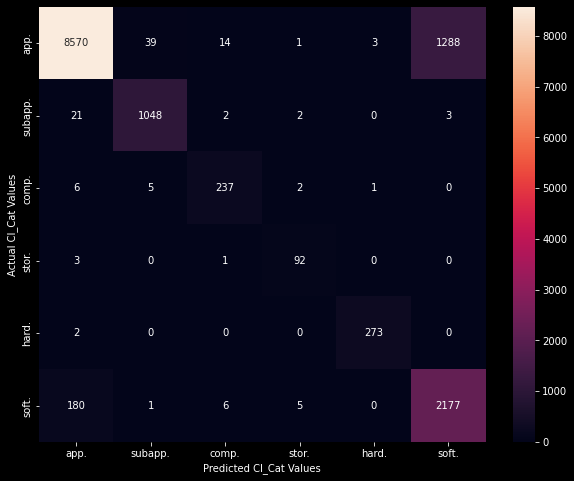

,precision,recall,f1-score,support
0,0.86,0.98,0.92,8782
1,0.97,0.96,0.97,1093
2,0.94,0.91,0.93,260
3,0.96,0.90,0.93,102
4,0.99,0.99,0.99,277
5,0.92,0.63,0.75,3468
accuracy,0.89,0.89,0.89,0
macro avg,0.94,0.89,0.91,13982
weighted avg,0.89,0.89,0.88,13982


In [ ]:
#collapse
classes = ['app.','subapp.','comp.','stor.','hard.','soft.']
confusion_mat(model8, classes,'CI_Cat')

### <font color=blue>3. XGBoost Classifier</font>

In [ ]:
#collapse
# Training the model on the label encoded training set
model9 = XGBClassifier()
model9 = model9.fit(X_train,y_train)

Confusion Matrix :  👇🏻👇🏻👇🏻 



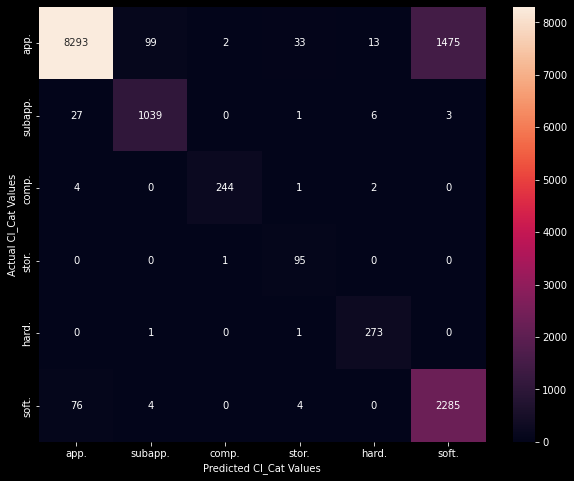

,precision,recall,f1-score,support
0,0.84,0.99,0.91,8400
1,0.97,0.91,0.94,1143
2,0.97,0.99,0.98,247
3,0.99,0.70,0.82,135
4,0.99,0.93,0.96,294
5,0.96,0.61,0.75,3763
accuracy,0.87,0.87,0.87,0
macro avg,0.95,0.85,0.89,13982
weighted avg,0.89,0.87,0.87,13982


In [ ]:
#collapse
classes = ['app.','subapp.','comp.','stor.','hard.','soft.']
confusion_mat(model9, classes,'CI_Cat')